# MSILINI Yassine - DA Assignment 1, M2CHPS

## Exercise 1 - [30%]

**a)**

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def ransac_regression(X, y, n_iterations=100, sample_size=2, threshold=1.0, min_inliers=50):
    """
    Implements the RANSAC algorithm.

    Parameters:
    - X: array, shape (n_samples, n_features)
    - y: array shape (n_samples,)
    - n_iterations: int
    - sample_size: int
      Minimum number of points to fit the model.
    - threshold: float
      Threshold for inliers.
    - min_inliers: int
      Minimum number of inlier to accept a model.

    Returns:
    - final_model: the model fitted on the inliers.
    - best_inliers: inliers from the best model.
    """
    best_model = None
    best_inliers = None
    max_inliers = 0

    for i in range(n_iterations):
        # Select a random subset of pts
        indices = np.random.choice(len(X), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit the model with said subset
        model = LinearRegression()
        model.fit(X_sample, y_sample)

        # Compute residuals for the entire dataset
        y_pred = model.predict(X)
        residuals = np.abs(y - y_pred)

        # Determine which points are inliers
        inliers = residuals < threshold
        num_inliers = np.sum(inliers)

        # Update the best model if a higher number of inliers is found
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            best_model = model
            best_inliers = inliers
            
    print("Max inliers found:", max_inliers)

    # Fit the final model using all identified inliers
    if max_inliers > min_inliers:
        X_inliers = X[best_inliers.flatten()]
        y_inliers = y[best_inliers.flatten()]
        final_model = LinearRegression()
        final_model.fit(X_inliers, y_inliers)
        print("Curve adjusted with", max_inliers, "inliers.")
    else:
        print("No model found, increase the threshold or min_inliers.")
        final_model = None

    return final_model, best_inliers

Max inliers found: 98
Curve adjusted with 98 inliers.
MSE of my RANSAC: 15.301736364606388
MSE of scikit-learn RANSAC: 15.348494177357034
MSE of Linear Regression: 12.910110850921058


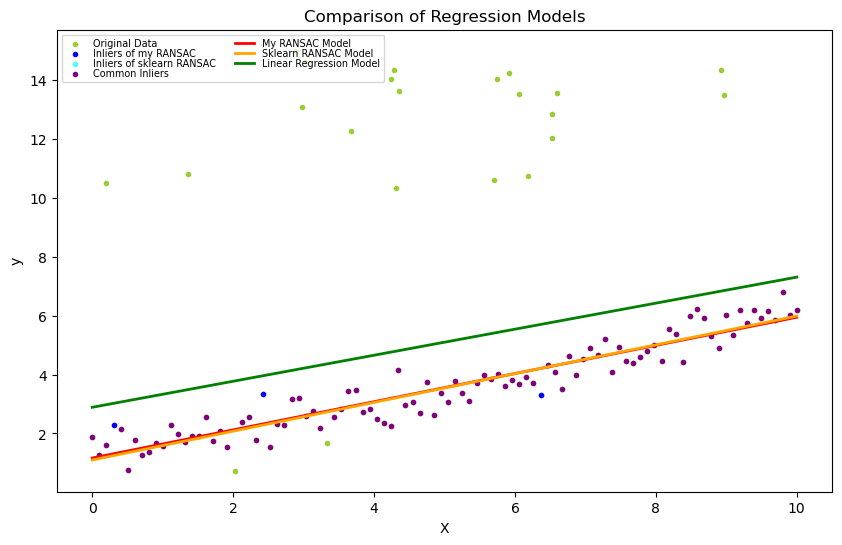

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 0.5 * X + 1 + np.random.normal(0, 0.5, size=X.shape)

# Add outliers
X_outliers = np.random.uniform(0, 10, size=20)
y_outliers = np.random.uniform(10, 15, size=20)

# Data + outliers
X = np.concatenate((X, X_outliers))
y = np.concatenate((y, y_outliers))

# Reshape to column vectors
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Hyperparameters
n_iterations = 100
sample_size = 2
threshold = 1.0
min_inliers = 50

final_model_yassine, inliers_yassine = ransac_regression(
    X, y, n_iterations=n_iterations, sample_size=sample_size, threshold=threshold, min_inliers=min_inliers
)

# Convert to 1D boolean array
inliers_yassine = inliers_yassine.flatten()

ransac_sk = RANSACRegressor(estimator=LinearRegression(), 
                            max_trials=n_iterations, 
                            residual_threshold=threshold, 
                            min_samples=sample_size)
ransac_sk.fit(X, y.ravel())
inliers_sk = ransac_sk.inlier_mask_

inliers_sk = inliers_sk.flatten()

# Identify common inliers
inliers_both = inliers_yassine & inliers_sk
inliers_yassine_only = inliers_yassine & ~inliers_both
inliers_sk_only = inliers_sk & ~inliers_both

# Fit linear regression 
lr = LinearRegression()
lr.fit(X, y)

# Test set for predictions
X_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Predictions for each model
y_pred_yassine = final_model_yassine.predict(X_test)
y_pred_sk = ransac_sk.predict(X_test)
y_pred_lr = lr.predict(X_test)

# MSE
mse_yassine = mean_squared_error(y, final_model_yassine.predict(X))
mse_sk = mean_squared_error(y, ransac_sk.predict(X))
mse_lr = mean_squared_error(y, lr.predict(X))

print("MSE of my RANSAC:", mse_yassine)
print("MSE of scikit-learn RANSAC:", mse_sk)
print("MSE of Linear Regression:", mse_lr)

plt.figure(figsize=(10, 6))

# Original data
plt.scatter(X, y, color='yellowgreen', marker='.', label='Original Data')

plt.scatter(X[inliers_yassine_only], y[inliers_yassine_only], color='blue', marker='.', label='Inliers of my RANSAC')

plt.scatter(X[inliers_sk_only], y[inliers_sk_only], color='cyan', marker='.', label='Inliers of sklearn RANSAC', alpha=0.6)

plt.scatter(X[inliers_both], y[inliers_both], color='purple', marker='.', label='Common Inliers')

# Plot models
plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')

plt.legend(fontsize='x-small', loc='upper left', ncol=2, labelspacing=0.0)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Regression Models")
plt.show()

##### *My RANSAC got a lower MSE than the sklearn MSE meaning that it performed a little bit better meaning that both RANSAC even if both of them found the exact same number of inliers, the choosen inliers themselves are differnt, but both RANSAC got lower scores than the linear regression because there are not this much outliers, in a real dataset situation the LR should not be better and it can be a little be seen on the plot with the LR being much more higher because of those outliers.*

**a1)**

Number of inliers: 950


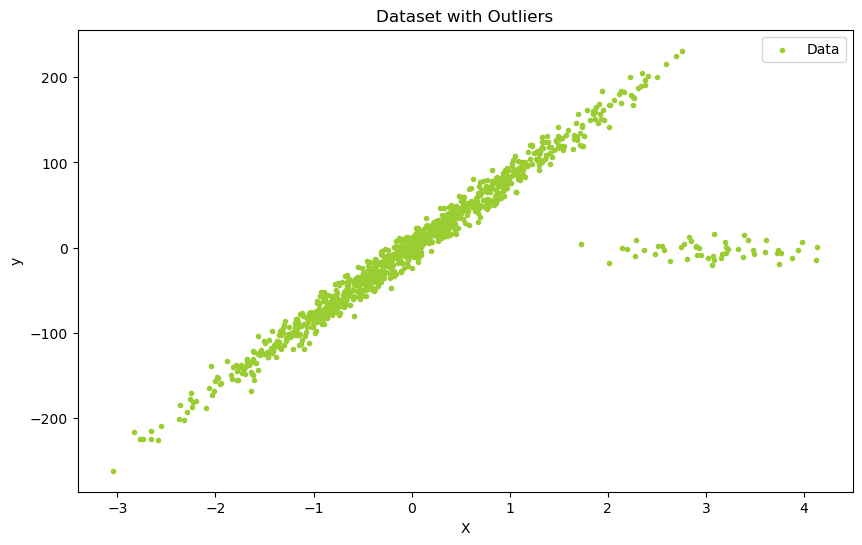

Max inliers found: 802
Curve adjusted with 802 inliers.
MSE of my RANSAC: 3539.556593392639
MSE of sklearn RANSAC: 3501.888599552627
MSE of linear regression: 2217.571624738731


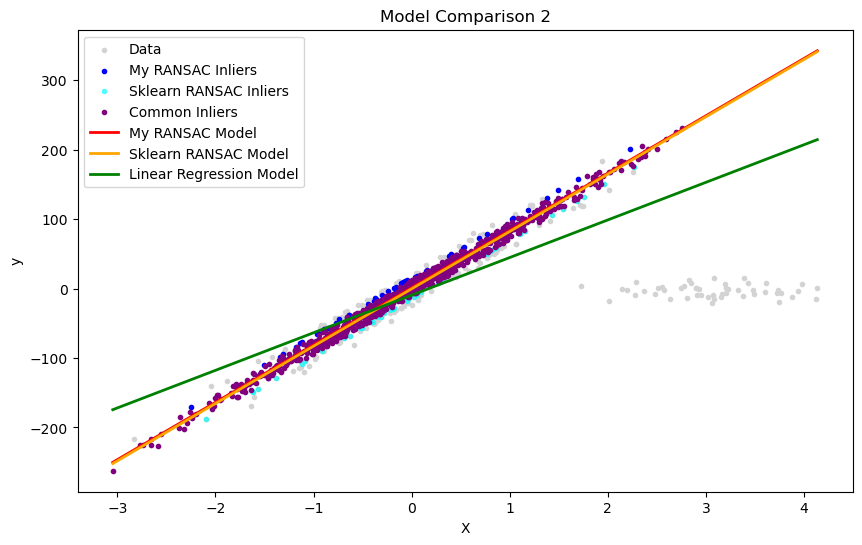

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error

N_samples = 1000
N_outliers = 50

# Dataset
X, y, coef = datasets.make_regression(
    n_samples=N_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0
)

# Add outliers
np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)

print("Number of inliers:", len(X_inliers))

# Plot dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset with Outliers')
plt.legend()
plt.show()

# Hyperparamaters
n_iterations = 100
sample_size = 2
threshold = 14.6  
min_inliers = 800  

final_model_yassine, inliers_yassine = ransac_regression(
    X, y, n_iterations=n_iterations, sample_size=sample_size, threshold=threshold, min_inliers=min_inliers
)

# scikit-learn's RANSAC
ransac_sk = RANSACRegressor(
    estimator=LinearRegression(),
    max_trials=n_iterations,
    residual_threshold=threshold,
    min_samples=sample_size,
    random_state=0
)
ransac_sk.fit(X, y)
inliers_sk = ransac_sk.inlier_mask_

# Common inliers for plot
inliers_both = inliers_yassine & inliers_sk
inliers_yassine_only = inliers_yassine & ~inliers_both
inliers_sk_only = inliers_sk & ~inliers_both

# Linear regression
lr = LinearRegression()
lr.fit(X, y)

# Test set
X_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Predictions
y_pred_yassine = final_model_yassine.predict(X_test)
y_pred_sk = ransac_sk.predict(X_test)
y_pred_lr = lr.predict(X_test)

# MSE
mse_yassine = mean_squared_error(y, final_model_yassine.predict(X))
mse_sk = mean_squared_error(y, ransac_sk.predict(X))
mse_lr = mean_squared_error(y, lr.predict(X))


print("MSE of my RANSAC:", mse_yassine)
print("MSE of sklearn RANSAC:", mse_sk)
print("MSE of linear regression:", mse_lr)

plt.figure(figsize=(10, 6))

# Original data
plt.scatter(X, y, color='lightgray', marker='.', label='Data')

plt.scatter(X[inliers_yassine_only], y[inliers_yassine_only], color='blue', marker='.', label='My RANSAC Inliers')

plt.scatter(X[inliers_sk_only], y[inliers_sk_only], color='cyan', marker='.', label='Sklearn RANSAC Inliers', alpha=0.6)

plt.scatter(X[inliers_both], y[inliers_both], color='purple', marker='.', label='Common Inliers')

# Models
plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Comparison 2')
plt.legend()
plt.show()

##### *As we can see on the plot, my model managed to choose a lot of inliers in common with the sklearn RANSAC meaning that it's not a bad implementation but seeing the MSE shows us than in a more complex dataset than the first one used for our first comparison, my RANSAC is less efficent than the skleanr RANSAC, and like before the LR has the lowest MSE but with a curve that show a lot of influence from the outliers in the lower part of the plot*

**a2) - Extra Noise %p**

Max inliers found: 788
Curve adjusted with 788 inliers.


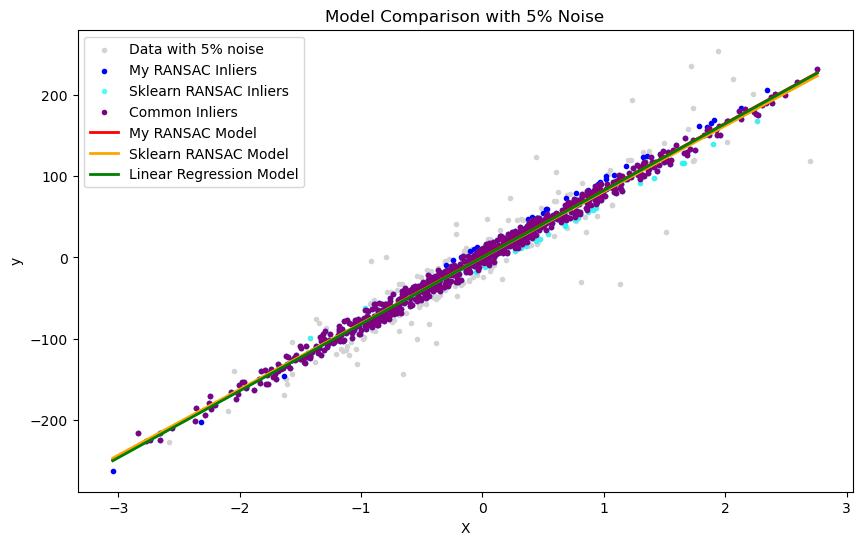

Noise Percentage: 5%
MSE My RANSAC: 240.54
MSE Sklearn RANSAC: 241.44
MSE Linear Regression: 240.13

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 759
Curve adjusted with 759 inliers.


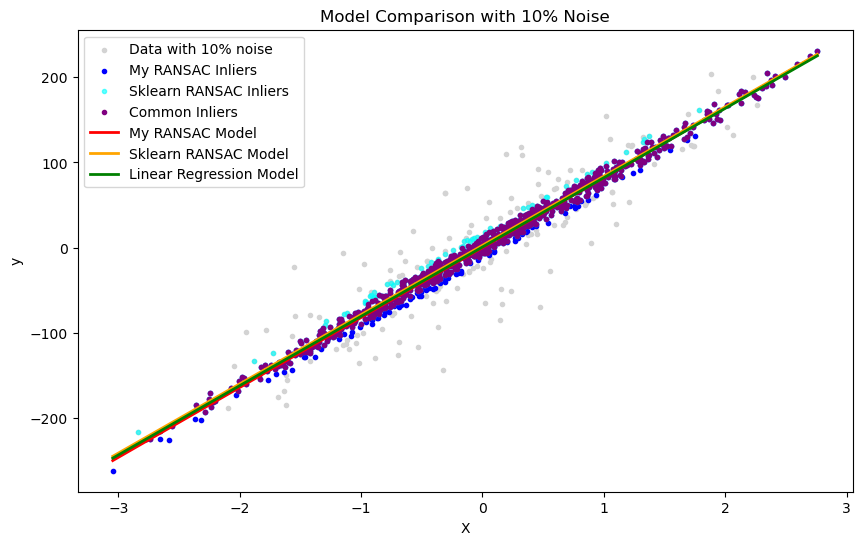

Noise Percentage: 10%
MSE My RANSAC: 329.51
MSE Sklearn RANSAC: 332.23
MSE Linear Regression: 328.45

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 693
Curve adjusted with 693 inliers.


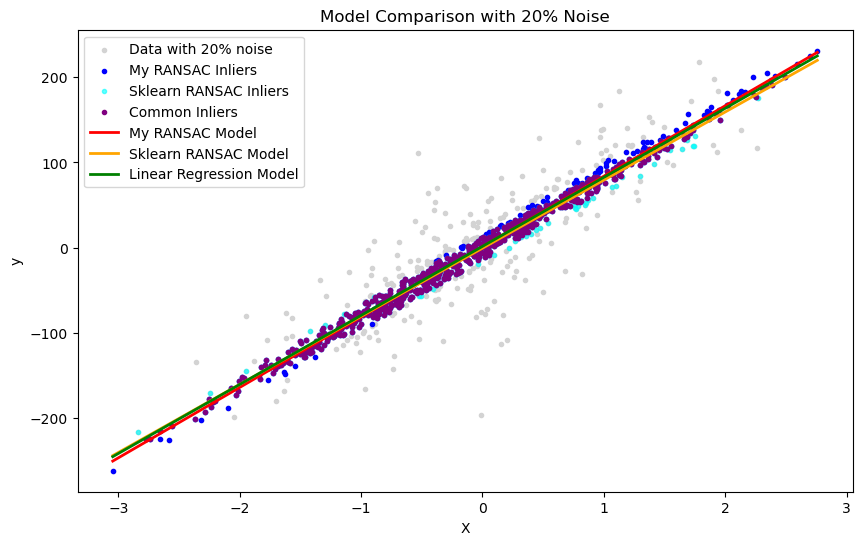

Noise Percentage: 20%
MSE My RANSAC: 580.39
MSE Sklearn RANSAC: 583.29
MSE Linear Regression: 577.75

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 649
Curve adjusted with 649 inliers.


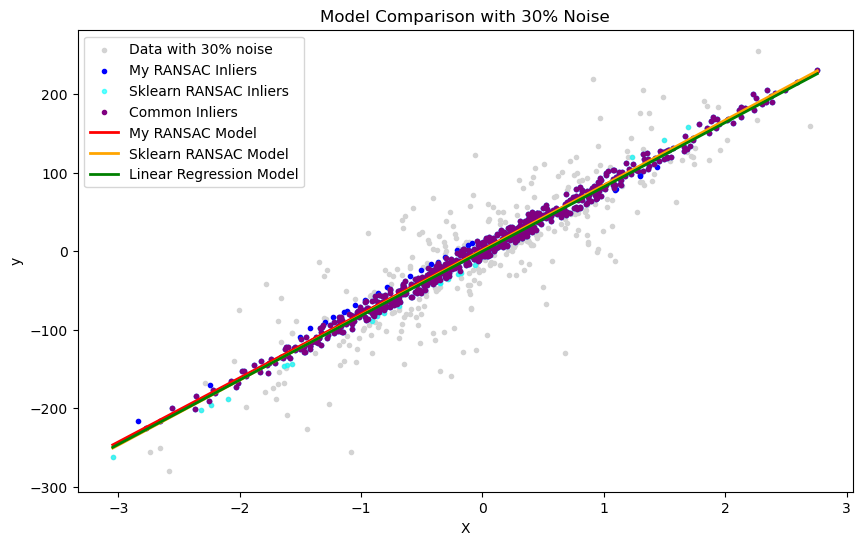

Noise Percentage: 30%
MSE My RANSAC: 800.75
MSE Sklearn RANSAC: 798.87
MSE Linear Regression: 796.14

 --------------------------------------------------------------------------------------------------- 



In [50]:
percentages = [5, 10, 20, 30]

for p in percentages:
    n_noisy = int(p / 100 * len(X_inliers))
    
    # Copy data
    X_data = X_inliers.copy()
    y_data = y_inliers.copy()
    
    # Random noisy points
    noisy_indices = np.random.choice(len(X_inliers), size=n_noisy, replace=False)
    
    # Add Gaussian noise
    noise = np.random.normal(0, 50, size=n_noisy)
    y_data[noisy_indices] += noise
    
    # Combine data
    X_combined = X_data
    y_combined = y_data
    
    # Shuffle
    shuffled_indices = np.random.permutation(len(X_combined))
    X_combined = X_combined[shuffled_indices]
    y_combined = y_combined[shuffled_indices]
    
    # Apply models
    final_model_yassine, inliers_yassine = ransac_regression(
        X_combined, y_combined, n_iterations=100, sample_size=2, threshold=15.0, min_inliers=500
    )
    
    ransac_sk = RANSACRegressor(
        estimator=LinearRegression(),
        max_trials=100,
        residual_threshold=15.0,
        min_samples=2,
        random_state=0
    )
    ransac_sk.fit(X_combined, y_combined)
    inliers_sk = ransac_sk.inlier_mask_

    lr = LinearRegression()
    lr.fit(X_combined, y_combined)
    
    # Predictions
    X_test = np.linspace(X_combined.min(), X_combined.max(), 1000).reshape(-1, 1)
    y_pred_yassine = final_model_yassine.predict(X_test)
    y_pred_sk = ransac_sk.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    
    # MSE
    mse_yassine = mean_squared_error(y_combined, final_model_yassine.predict(X_combined))
    mse_sk = mean_squared_error(y_combined, ransac_sk.predict(X_combined))
    mse_lr = mean_squared_error(y_combined, lr.predict(X_combined))
    
    # Common inliers
    common_inliers = inliers_yassine & inliers_sk

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_combined, y_combined, color='lightgray', marker='.', label='Data with {}% noise'.format(p))
    plt.scatter(X_combined[inliers_yassine], y_combined[inliers_yassine], color='blue', marker='.', label='My RANSAC Inliers')
    plt.scatter(X_combined[inliers_sk], y_combined[inliers_sk], color='cyan', marker='.', label='Sklearn RANSAC Inliers', alpha=0.6)
    plt.scatter(X_combined[common_inliers], y_combined[common_inliers], color='purple', marker='.', label='Common Inliers')
    plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
    plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
    plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Model Comparison with {}% Noise'.format(p))
    plt.legend()
    plt.show()
    
    # Results
    print('Noise Percentage: {}%'.format(p))
    print('MSE My RANSAC: {:.2f}'.format(mse_yassine))
    print('MSE Sklearn RANSAC: {:.2f}'.format(mse_sk))
    print('MSE Linear Regression: {:.2f}'.format(mse_lr))
    print('\n', '-' * 99, '\n')

##### *As we can see on these plots & the different MSEs, the RANSAC algorithm (mine and sklearn's) are robust on weak noise (especially mine having a lower or almost equal MSE to the LR), sklearn model is a less robust on strong noises but is doing good, concerning the plots & curves except for the 20% noise where the sklearn's RANSAC perform badly and the curve is very dissociate from the two other curves, every other one are almost perfetly aligned.*

**a2) - Positive noise only %p**

Max inliers found: 775
Curve adjusted with 775 inliers.


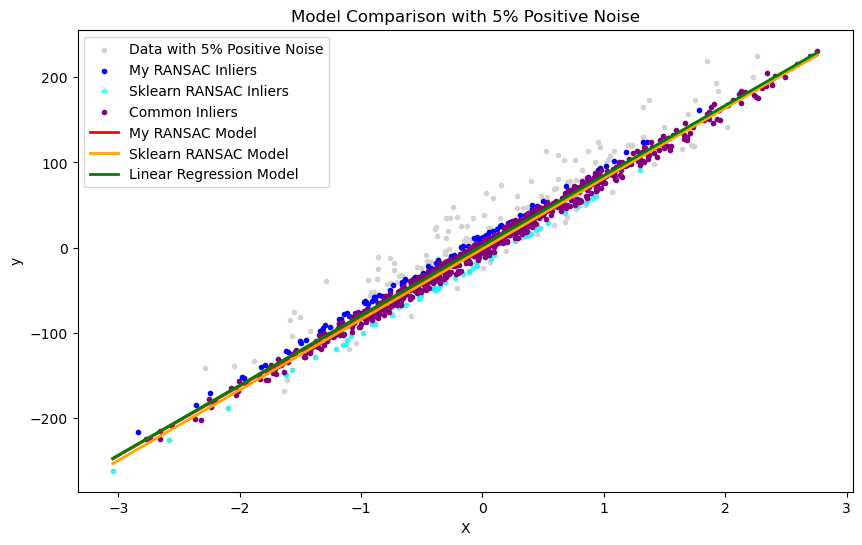

Noise Percentage: 5%
MSE My RANSAC: 203.52
MSE Sklearn RANSAC: 219.37
MSE Linear Regression: 200.37

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 740
Curve adjusted with 740 inliers.


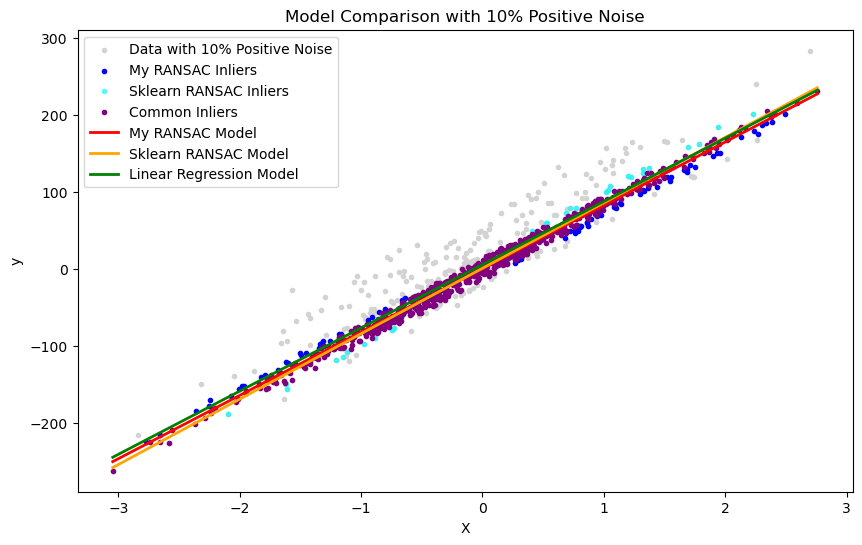

Noise Percentage: 10%
MSE My RANSAC: 353.93
MSE Sklearn RANSAC: 357.54
MSE Linear Regression: 326.36

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 662
Curve adjusted with 662 inliers.


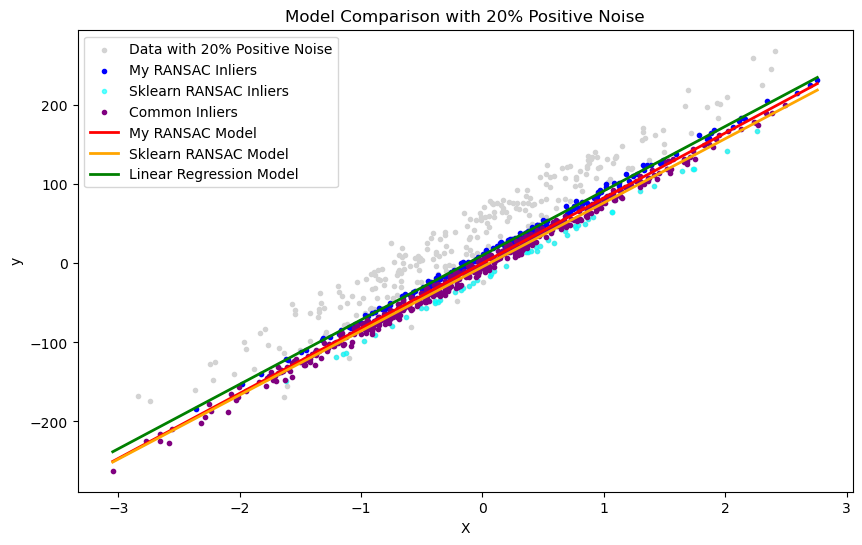

Noise Percentage: 20%
MSE My RANSAC: 632.29
MSE Sklearn RANSAC: 745.01
MSE Linear Regression: 533.37

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 567
Curve adjusted with 567 inliers.


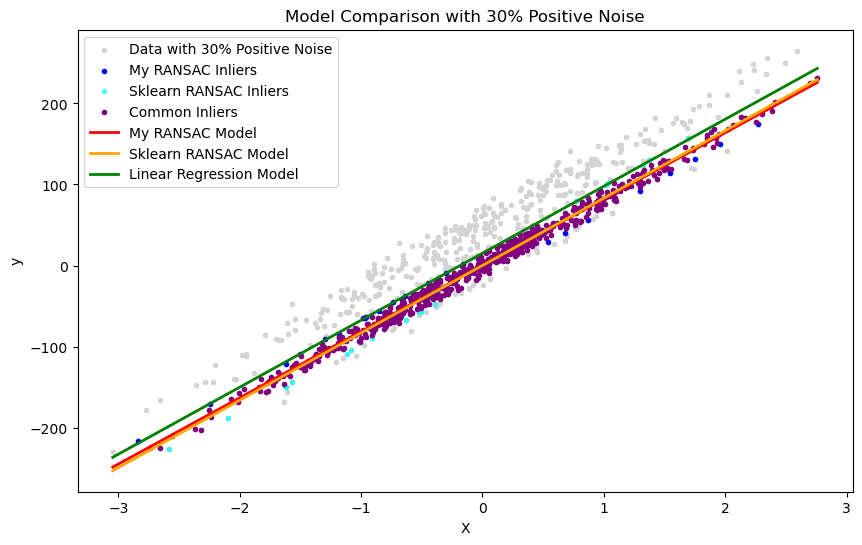

Noise Percentage: 30%
MSE My RANSAC: 862.07
MSE Sklearn RANSAC: 871.83
MSE Linear Regression: 641.76

 --------------------------------------------------------------------------------------------------- 



In [56]:
for p in percentages:
    n_noisy = int(p / 100 * len(X_inliers))
    
    # Copy data
    X_data = X_inliers.copy()
    y_data = y_inliers.copy()
    
    # Random noisy points
    noisy_indices = np.random.choice(len(X_inliers), size=n_noisy, replace=False)
    
    # Add positive noise
    noise = np.abs(np.random.normal(50, 10, size=n_noisy))  
    y_data[noisy_indices] += noise
    
    # Combine data
    X_combined = X_data
    y_combined = y_data
    
    # Shuffle
    shuffled_indices = np.random.permutation(len(X_combined))
    X_combined = X_combined[shuffled_indices]
    y_combined = y_combined[shuffled_indices]
    
    # Apply models
    final_model_yassine, inliers_yassine = ransac_regression(
        X_combined, y_combined, n_iterations=100, sample_size=2, threshold=15.0, min_inliers=500
    )
    
    ransac_sk = RANSACRegressor(
        estimator=LinearRegression(),
        max_trials=100,
        residual_threshold=15.0,
        min_samples=2,
        random_state=0
    )
    ransac_sk.fit(X_combined, y_combined)
    inliers_sk = ransac_sk.inlier_mask_
    
    # Identify common inliers
    inliers_yassine = inliers_yassine.flatten()
    inliers_sk = inliers_sk.flatten()
    
    inliers_both = inliers_yassine & inliers_sk
    inliers_yassine_only = inliers_yassine & ~inliers_both
    inliers_sk_only = inliers_sk & ~inliers_both
    
    lr = LinearRegression()
    lr.fit(X_combined, y_combined)
    
    # Predictions
    X_test = np.linspace(X_combined.min(), X_combined.max(), 1000).reshape(-1, 1)
    y_pred_yassine = final_model_yassine.predict(X_test)
    y_pred_sk = ransac_sk.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    
    # MSE
    mse_yassine = mean_squared_error(y_combined, final_model_yassine.predict(X_combined))
    mse_sk = mean_squared_error(y_combined, ransac_sk.predict(X_combined))
    mse_lr = mean_squared_error(y_combined, lr.predict(X_combined))
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_combined, y_combined, color='lightgray', marker='.', label='Data with {}% Positive Noise'.format(p))
    
    plt.scatter(X_combined[inliers_yassine_only], y_combined[inliers_yassine_only], color='blue', marker='.', label='My RANSAC Inliers')
    
    plt.scatter(X_combined[inliers_sk_only], y_combined[inliers_sk_only], color='cyan', marker='.', label='Sklearn RANSAC Inliers', alpha=0.6)
    
    # Common inliers from both RANSAC models
    plt.scatter(X_combined[inliers_both], y_combined[inliers_both], color='purple', marker='.', label='Common Inliers')
    
    # Plot models
    plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
    plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
    plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Model Comparison with {}% Positive Noise'.format(p))
    plt.legend()
    plt.show()
    
    # Results
    print('Noise Percentage: {}%'.format(p))
    print('MSE My RANSAC: {:.2f}'.format(mse_yassine))
    print('MSE Sklearn RANSAC: {:.2f}'.format(mse_sk))
    print('MSE Linear Regression: {:.2f}'.format(mse_lr))
    print('\n', '-' * 99, '\n')

##### *As we can see, the LR is more robust to positive noise because of its tendancies to be influenced by outliers with weaker MSE than my RANSAC and sklearn RANSAC regardless of the noise. But fortunately, our RANSAC is performing better & is more robust than the one from sklearn*

**a2) -Lowest Y noise %p**

Max inliers found: 771
Curve adjusted with 771 inliers.


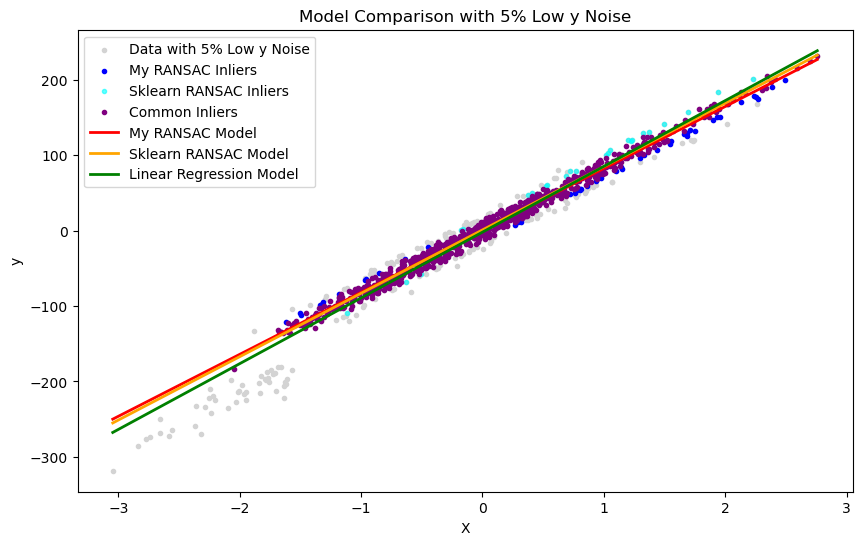

Noise Percentage: 5%
MSE My RANSAC: 239.23
MSE Sklearn RANSAC: 227.42
MSE Linear Regression: 208.31

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 732
Curve adjusted with 732 inliers.


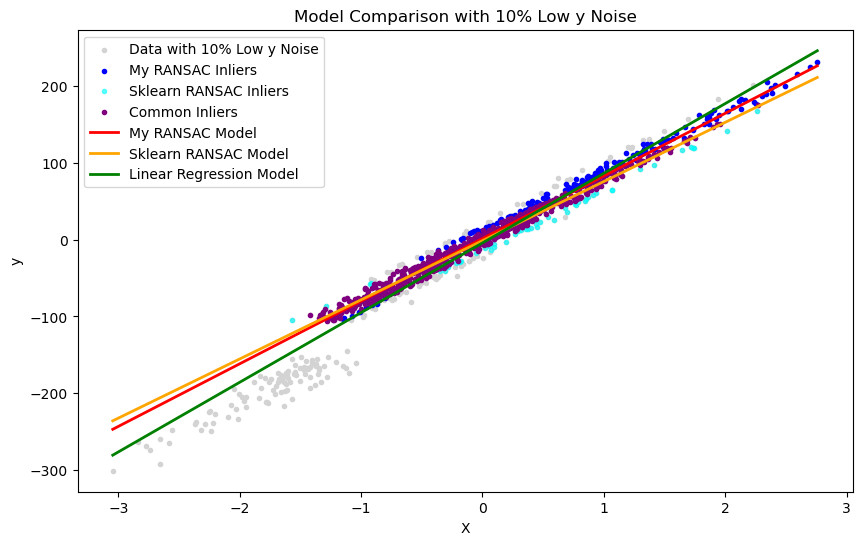

Noise Percentage: 10%
MSE My RANSAC: 396.36
MSE Sklearn RANSAC: 472.18
MSE Linear Regression: 277.56

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 648
Curve adjusted with 648 inliers.


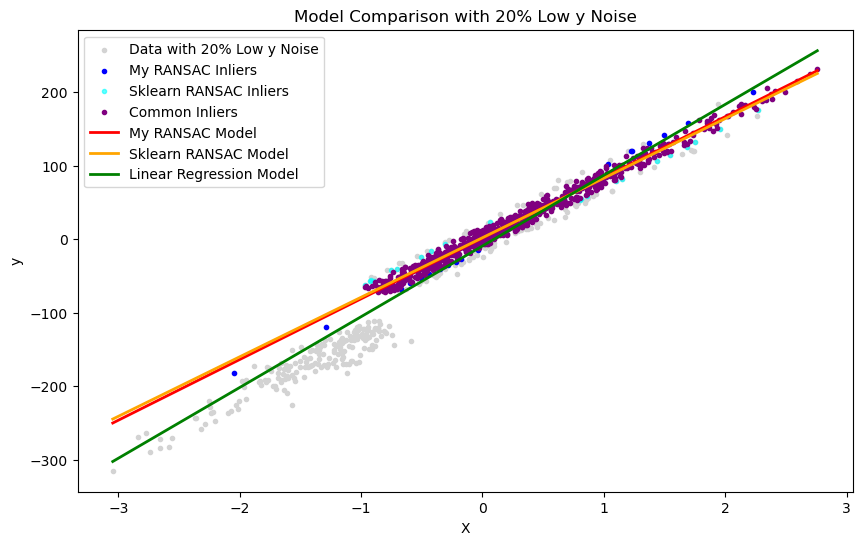

Noise Percentage: 20%
MSE My RANSAC: 678.16
MSE Sklearn RANSAC: 737.17
MSE Linear Regression: 370.31

 --------------------------------------------------------------------------------------------------- 

Max inliers found: 574
Curve adjusted with 574 inliers.


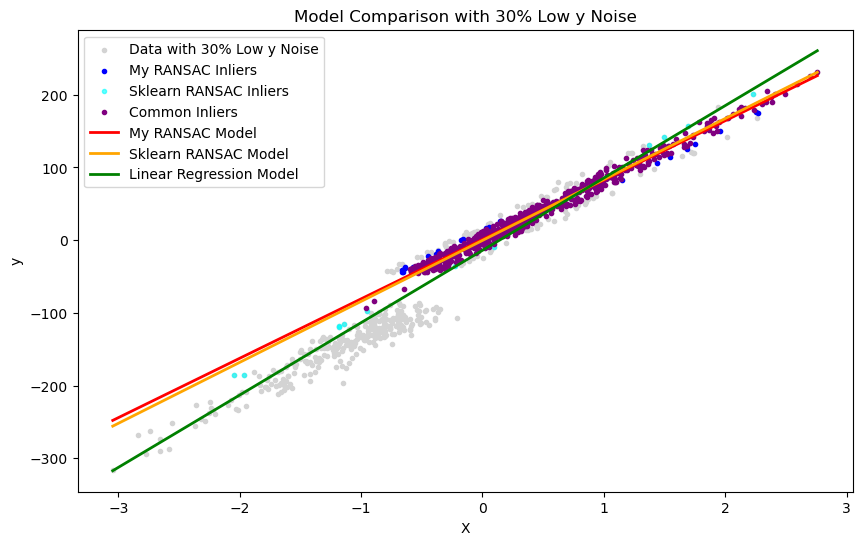

Noise Percentage: 30%
MSE My RANSAC: 973.97
MSE Sklearn RANSAC: 861.83
MSE Linear Regression: 419.82

 --------------------------------------------------------------------------------------------------- 



In [61]:
for p in percentages:
    n_noisy = int(p / 100 * len(X_inliers))
    
    # Copy data
    X_data = X_inliers.copy()
    y_data = y_inliers.copy()
    
    # Sort indices of y (ascending)
    sorted_indices = np.argsort(y_inliers.flatten())
    
    # Select indices with lowest y values
    noisy_indices = sorted_indices[:n_noisy]
    
    # Add negative noise (shift down)
    noise = -np.abs(np.random.normal(50, 10, size=n_noisy))
    y_data[noisy_indices] += noise
    
    # Combine data
    X_combined = X_data
    y_combined = y_data
    
    # Shuffle
    shuffled_indices = np.random.permutation(len(X_combined))
    X_combined = X_combined[shuffled_indices]
    y_combined = y_combined[shuffled_indices]
    
    # Apply models
    final_model_yassine, inliers_yassine = ransac_regression(
        X_combined, y_combined, n_iterations=100, sample_size=2, threshold=15.0, min_inliers=500
    )
    
    ransac_sk = RANSACRegressor(
        estimator=LinearRegression(),
        max_trials=100,
        residual_threshold=15.0,
        min_samples=2,
        random_state=0
    )
    ransac_sk.fit(X_combined, y_combined)
    inliers_sk = ransac_sk.inlier_mask_
    
    # Identify common inliers
    inliers_yassine = inliers_yassine.flatten()
    inliers_sk = inliers_sk.flatten()
    
    inliers_both = inliers_yassine & inliers_sk
    inliers_yassine_only = inliers_yassine & ~inliers_both
    inliers_sk_only = inliers_sk & ~inliers_both
    
    lr = LinearRegression()
    lr.fit(X_combined, y_combined)
    
    # Predictions
    X_test = np.linspace(X_combined.min(), X_combined.max(), 1000).reshape(-1, 1)
    y_pred_yassine = final_model_yassine.predict(X_test)
    y_pred_sk = ransac_sk.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    
    # MSE
    mse_yassine = mean_squared_error(y_combined, final_model_yassine.predict(X_combined))
    mse_sk = mean_squared_error(y_combined, ransac_sk.predict(X_combined))
    mse_lr = mean_squared_error(y_combined, lr.predict(X_combined))
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_combined, y_combined, color='lightgray', marker='.', label='Data with {}% Low y Noise'.format(p))
    
    plt.scatter(X_combined[inliers_yassine_only], y_combined[inliers_yassine_only], color='blue', marker='.', label='My RANSAC Inliers')
    
    plt.scatter(X_combined[inliers_sk_only], y_combined[inliers_sk_only], color='cyan', marker='.', label='Sklearn RANSAC Inliers', alpha=0.6)
    
    plt.scatter(X_combined[inliers_both], y_combined[inliers_both], color='purple', marker='.', label='Common Inliers')
    
    # Plot models
    plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
    plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
    plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Model Comparison with {}% Low y Noise'.format(p))
    plt.legend()
    plt.show()
    
    # Results
    print('Noise Percentage: {}%'.format(p))
    print('MSE My RANSAC: {:.2f}'.format(mse_yassine))
    print('MSE Sklearn RANSAC: {:.2f}'.format(mse_sk))
    print('MSE Linear Regression: {:.2f}'.format(mse_lr))
    print('\n', '-' * 99, '\n')

##### *The LR here perform a lot more than the othber other with a MSE divided by 2 for 20 & 30% noises but My RANSAC is still better than the sklearn RANSAC even though both of them are not robust against Y axis noises.*

**b)**

Max inliers found: 811
Curve adjusted with 811 inliers.
Final model fitted with 750 selected points.

MSE My RANSAC: 3441.6471090408945
MSE Sklearn RANSAC: 3503.6927125112393
MSE Linear Regression: 2217.571624738731
MSE RANSAC Voting: 3355.98835763804


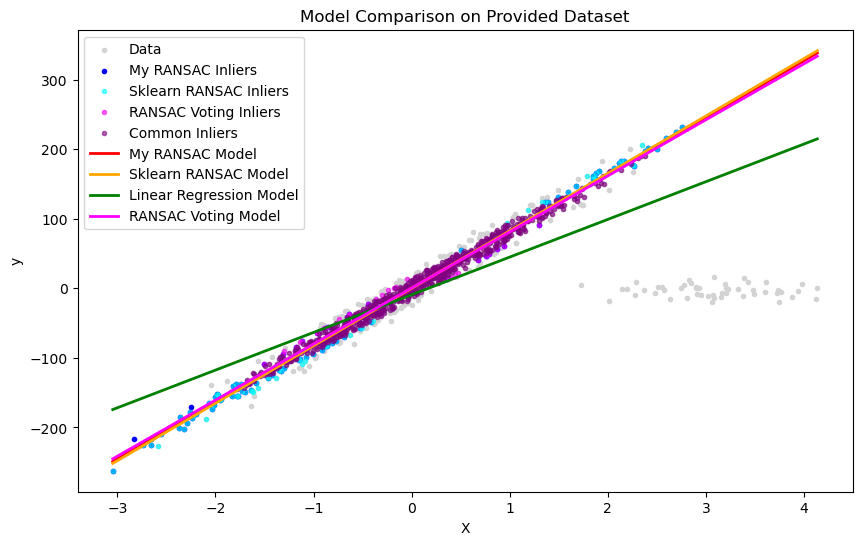

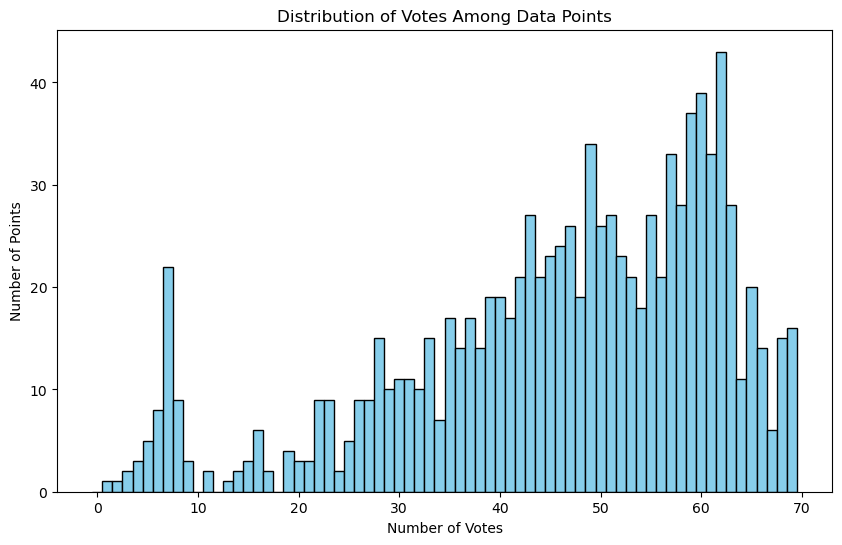

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error

def ransac_voting(X, y, n_iterations=100, sample_size=2, threshold=15.0, top_percentage=0.75):
    """
    Implements RANSAC with a voting mechanism.

    Parameters:
    - X: array, shape (n_samples, n_features)
    - y: array, shape (n_samples,)
    - n_iterations: int
      Number of iterations.
    - sample_size: int
    - threshold: float
    - top_percentage: float
      Percentage of top voted points to use for final model fitting.

    Returns:
    - final_model: LinearRegression model fitted on selected inliers.
    - top_inliers: boolean array, indicating selected inliers.
    - votes: array of vote counts for each data point.
    """
    import numpy as np
    from sklearn.linear_model import LinearRegression

    N = len(X)
    votes = np.zeros(N)
    
    for i in range(n_iterations):
        # Random subset
        indices = np.random.choice(N, size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]
        
        # Fit model
        model = LinearRegression()
        model.fit(X_sample, y_sample)
        
        # Calculate residuals
        y_pred = model.predict(X)
        residuals = np.abs(y - y_pred)

        # Identify inliers
        inliers = residuals < threshold
        
        # Increment votes for inliers
        votes[inliers] += 1
    
    # Select top voted points
    n_top = int(top_percentage * N)
    top_indices = np.argsort(-votes)[:n_top]
    top_inliers = np.zeros(N, dtype=bool)
    top_inliers[top_indices] = True
    
    # Fit final model
    final_model = LinearRegression()
    final_model.fit(X[top_inliers], y[top_inliers])
    
    print(f"Final model fitted with {n_top} selected points.")
    
    return final_model, top_inliers, votes

# Generate dataset
N_samples = 1000
N_outliers = 50

X, y, coef = datasets.make_regression(
    n_samples=N_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0
)

np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)


n_iterations = 100
sample_size = 2
threshold = 15.0
min_inliers = 700

final_model_yassine, inliers_yassine = ransac_regression(
    X, y, n_iterations=n_iterations, sample_size=sample_size, threshold=threshold, min_inliers=min_inliers
)

ransac_sk = RANSACRegressor(
    estimator=LinearRegression(),
    max_trials=n_iterations,
    residual_threshold=threshold,
    min_samples=sample_size,
    random_state=0
)
ransac_sk.fit(X, y)
inliers_sk = ransac_sk.inlier_mask_

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# RANSAC with voting
top_percentage = 0.75

final_model_voting, inliers_voting, votes = ransac_voting(
    X, y, n_iterations=n_iterations, sample_size=sample_size, threshold=threshold, top_percentage=top_percentage
)

# Identify common inliers
inliers_yassine = inliers_yassine.flatten()
inliers_sk = inliers_sk.flatten()
inliers_voting = inliers_voting.flatten()

# Identify common inliers sklearn, my models
common_inliers = inliers_yassine & inliers_sk & inliers_voting
unique_yassine = inliers_yassine & ~common_inliers
unique_sk = inliers_sk & ~common_inliers
unique_voting = inliers_voting & ~common_inliers

# Predictions and MSE
X_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

y_pred_yassine = final_model_yassine.predict(X_test)
y_pred_sk = ransac_sk.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_voting = final_model_voting.predict(X_test)

mse_yassine = mean_squared_error(y, final_model_yassine.predict(X))
mse_sk = mean_squared_error(y, ransac_sk.predict(X))
mse_lr = mean_squared_error(y, lr.predict(X))
mse_voting = mean_squared_error(y, final_model_voting.predict(X))

print("\nMSE My RANSAC:", mse_yassine)
print("MSE Sklearn RANSAC:", mse_sk)
print("MSE Linear Regression:", mse_lr)
print("MSE RANSAC Voting:", mse_voting)

# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='lightgray', marker='.', label='Data')

# Show inliers from each model and common inliers
plt.scatter(X[unique_yassine], y[unique_yassine], color='blue', marker='.', label='My RANSAC Inliers')
plt.scatter(X[unique_sk], y[unique_sk], color='cyan', marker='.', label='Sklearn RANSAC Inliers', alpha=0.6)
plt.scatter(X[unique_voting], y[unique_voting], color='magenta', marker='.', label='RANSAC Voting Inliers', alpha=0.6)
plt.scatter(X[common_inliers], y[common_inliers], color='purple', marker='.', label='Common Inliers', alpha=0.6)

# Plot models
plt.plot(X_test, y_pred_yassine, color='red', linewidth=2, label='My RANSAC Model')
plt.plot(X_test, y_pred_sk, color='orange', linewidth=2, label='Sklearn RANSAC Model')
plt.plot(X_test, y_pred_lr, color='green', linewidth=2, label='Linear Regression Model')
plt.plot(X_test, y_pred_voting, color='magenta', linewidth=2, label='RANSAC Voting Model')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Comparison on Provided Dataset')
plt.legend()
plt.show()

# Plot vote distribution
plt.figure(figsize=(10, 6))
plt.hist(votes, bins=range(int(votes.max()) + 1), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Points')
plt.title('Distribution of Votes Among Data Points')
plt.show()

##### *The voting system shows promising result with a better MSE than the previous implementation and sklearn version suggesting that using a vote identification is better for inliers & more efficient but again LR still perform better when it is about the MSE but it's curve is influenced by the outliers.*

##### *We can see on the histogram that the one receiving more vote are the one considered the most as inliers validating the robustness of this approach.*

**c1)**

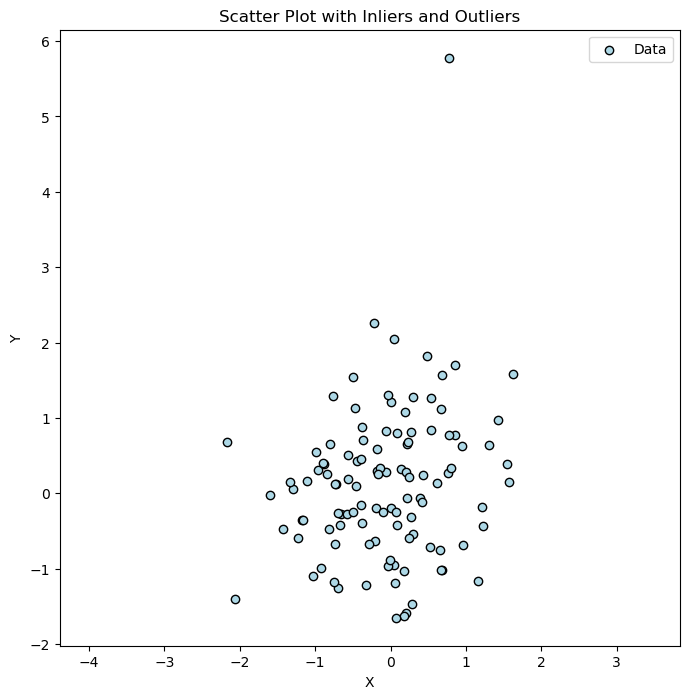

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed
np.random.seed(42)

# Generate inliers
n_inliers = 100
mu_inliers = [0, 0]
sigma_inliers = 0.83
X_inliers = np.random.normal(mu_inliers, sigma_inliers, size=(n_inliers, 2))

# Generate outliers
n_outliers = 10
mu_outliers = [0, 0]
sigma_outliers = 1.5
X_outliers = np.random.normal(mu_outliers, sigma_outliers, size=(n_outliers, 2))

# Combine data
X = np.vstack((X_inliers, X_outliers))

# Shuffle data
np.random.shuffle(X)

# Plot data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='lightblue', edgecolor='k', label='Data')
plt.title('Scatter Plot with Inliers and Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

In [67]:
def ransac_mean_estimation(X, n_iterations=100, sample_size=3, threshold=1.0, min_inliers=50):
    """
    Implements RANSAC to estimate the center of inliers in a point cloud.
    
    Parameters:
    - X: array-like, shape (n_samples, 2)
    - n_iterations: int
    - sample_size: int
      Minimum numb    - min_inliers: int
      Minimum inliers required to accept a model.
    
    Returns:
    - best_center: ndarray, shape (2,)
      Estimated center of inliers.
    - best_inliers: boolean array, inliers of the best model.
    """
    best_center = None
    best_inliers = None
    max_inliers = 0
    
    n_samples = X.shape[0]
    
    for i in range(n_iterations):
        # Random sampling
        indices = np.random.choice(n_samples, size=sample_size, replace=False)
        sample_points = X[indices]
        
        # Estimate center (mean of sampled points)
        center = np.mean(sample_points, axis=0)
        
        # Calculate distances to estimated center
        distances = np.linalg.norm(X - center, axis=1)
        
        # Identify inliers
        inliers = distances < threshold
        num_inliers = np.sum(inliers)
        
        # Update best model
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            best_center = center
            best_inliers = inliers
    
    # Check if a valid model was found
    if max_inliers > min_inliers:
        # Recalculate center using all inliers from the best model
        best_center = np.mean(X[best_inliers], axis=0)
        print(f"Final model fitted with {max_inliers} inliers.")
    else:
        print("No satisfactory model found.")
        best_center = None
    
    return best_center, best_inliers

Final model fitted with 81 inliers.


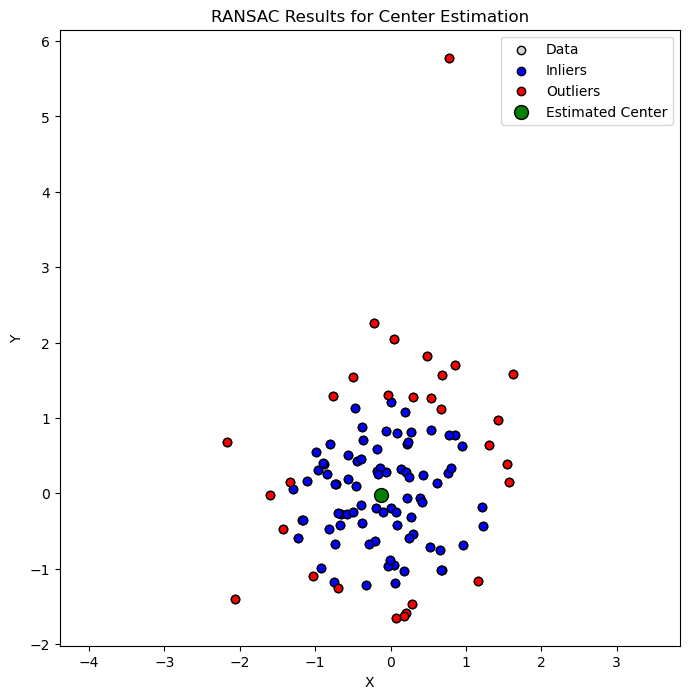

True center of inliers: [-0.09591833  0.02823853]
Estimated center by RANSAC: [-0.1225253 -0.0224597]
Estimation error: 0.057255928973889966


In [68]:
n_iterations = 100
sample_size = 3
threshold = 1.317  
min_inliers = 80 

# Apply RANSAC to estimate the center
best_center, best_inliers = ransac_mean_estimation(
    X, n_iterations=n_iterations, sample_size=sample_size, threshold=threshold, min_inliers=min_inliers
)

# Plot data with inliers and ester
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], color='lightgray', edgecolor='k', label='Data')
plt.scatter(X[best_inliers, 0], X[best_inliers, 1], color='blue', edgecolor='k', label='Inliers')
plt.scatter(X[~best_inliers, 0], X[~best_inliers, 1], color='red', edgecolor='k', label='Outliers')
plt.scatter(best_center[0], best_center[1], color='green', edgecolor='k', s=100, label='Estimated Center')
plt.title('RANSAC Results for Center Estimation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

# True center of inliers
true_center = np.mean(X_inliers, axis=0)

print(f"True center of inliers: {true_center}")
print(f"Estimated center by RANSAC: {best_center}")

# Calculate error between estimated and true center
error = np.linalg.norm(best_center - true_center)
print(f"Estimation error: {error}")

**c2)**

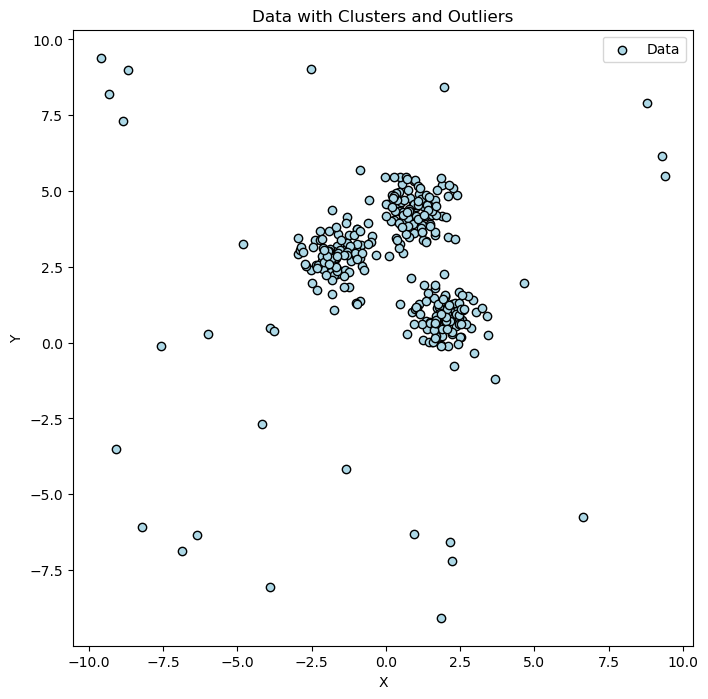

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)

# Generate data with 3 clusters
n_samples = 300
n_clusters = 3
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)

# Add outliers
n_outliers = 30
X_outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

# Combine data
X_combined = np.vstack((X, X_outliers))

# Plot data
plt.figure(figsize=(8, 8))
plt.scatter(X_combined[:, 0], X_combined[:, 1], color='lightblue', edgecolor='k', label='Data')
plt.title('Data with Clusters and Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [74]:
from sklearn.cluster import KMeans

def ransac_clustering(X, n_clusters=3, n_iterations=100, sample_size=None, threshold=1.0, min_inliers=100):
    """
    Implements RANSAC for robust clustering using k-means as the internal model.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
      Data to cluster.
    - n_clusters: int
      Number of clusters (k).
    - n_iterations: int
    - sample_size: int
      If None, sample_size = n_clusters * 2
    - threshold: float
    - min_inliers: int
    
    Returns:
    - best_model: KMeans instance fitted on the inliers of the best model.
    - best_inliers: boolean array, inliers from the best model.
    - best_labels: array, cluster labels for the best inliers.
    """
    if sample_size is None:
        sample_size = n_clusters * 2  # At least two points per cluster for the sample
    
    best_model = None
    best_inliers = None
    max_inliers = 0
    
    n_samples = X.shape[0]
    
    for i in range(n_iterations):
        # Random sampling
        if n_samples < sample_size:
            raise ValueError("Number of points is less than sample size.")
        indices = np.random.choice(n_samples, size=sample_size, replace=False)
        sample_points = X[indices]
        
        # Fit k-means on the sample
        kmeans_sample = KMeans(n_clusters=n_clusters, random_state=0).fit(sample_points)
        centroids = kmeans_sample.cluster_centers_
        
        # Assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        min_distances = np.min(distances, axis=1)
        
        # Identify inliers
        inliers = min_distances < threshold
        num_inliers = np.sum(inliers)
        
        # Update best model
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            best_inliers = inliers
            best_labels = labels
            best_centroids = centroids
    
    # Check if a valid model was found
    if max_inliers > min_inliers:
        # Refit k-means on all inliers
        best_model = KMeans(n_clusters=n_clusters, init=best_centroids, n_init=1, random_state=0).fit(X[best_inliers])
        print(f"Final model fitted with {max_inliers} inliers.")
    else:
        print("No satisfactory model found.")
        best_model = None
        best_labels = None
        best_inliers = None
    
    return best_model, best_inliers, best_labels

Final model fitted with 253 inliers.


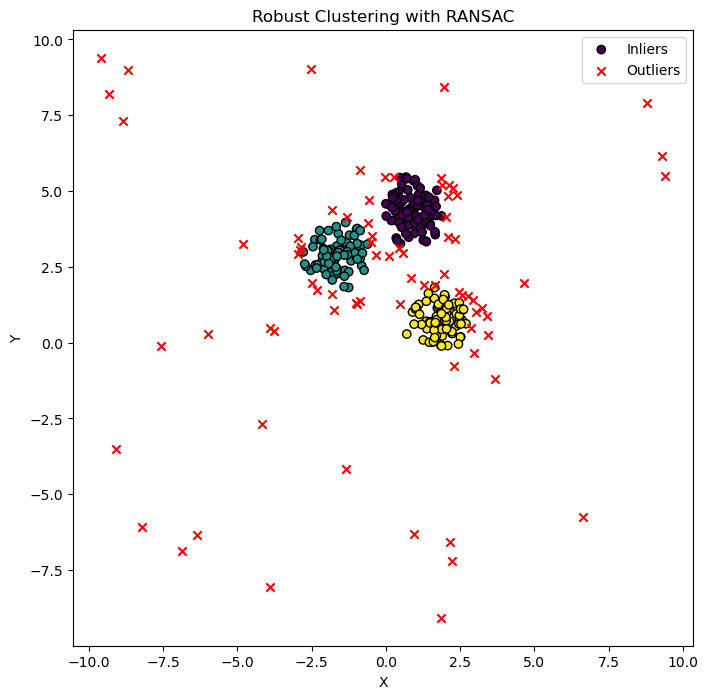

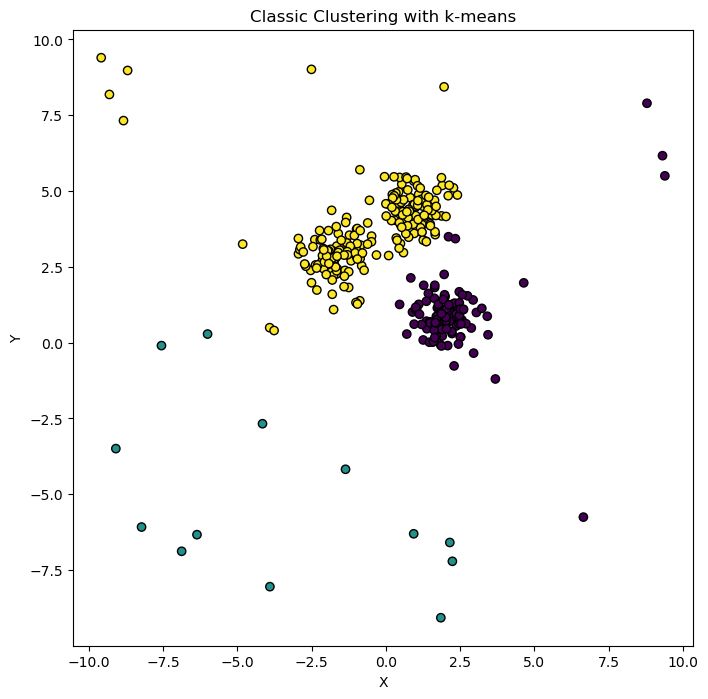

In [75]:
import warnings
warnings.filterwarnings('ignore')

n_clusters = 3
n_iterations = 100
threshold = 1.194  # Adjust based on intra-cluster distance distribution
min_inliers = 250 

best_model, best_inliers, best_labels = ransac_clustering(
    X_combined, n_clusters=n_clusters, n_iterations=n_iterations, threshold=threshold, min_inliers=min_inliers
)

# Plot clusters and outliers
plt.figure(figsize=(8, 8))
# Inliers
plt.scatter(X_combined[best_inliers, 0], X_combined[best_inliers, 1], c=best_model.labels_, cmap='viridis', marker='o', edgecolor='k', label='Inliers')
# Outliers
plt.scatter(X_combined[~best_inliers, 0], X_combined[~best_inliers, 1], color='red', marker='x', label='Outliers')
plt.title('Robust Clustering with RANSAC')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Apply classic k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_combined)

# Plot k-means clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k')
plt.title('Classic Clustering with k-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**c3)**

## Exercise 2 - [15%]

**2.6**

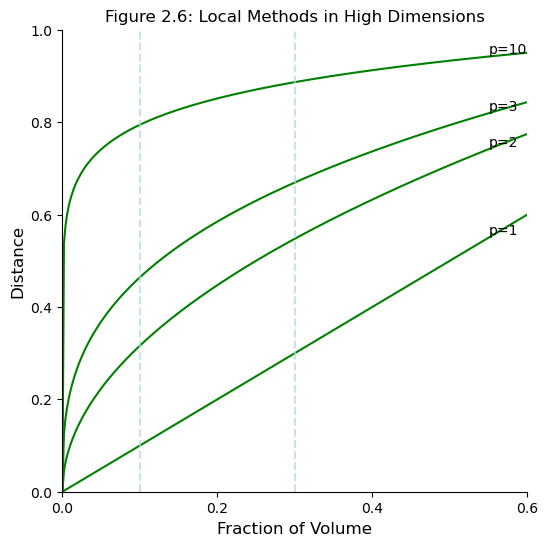

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# p values
p_values = [1, 2, 3, 10]

# Fraction range (x-axis)
fractions = np.linspace(0, 0.6, 300)

# Distance function
def calculate_distance(fraction, p):
    return fraction ** (1 / p)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Draw curves
for p in p_values:
    distances = calculate_distance(fractions, p)
    ax.plot(fractions, distances, label=f'p={p}', color='green')

# Axis settings
ax.set_xlim(0, 0.6)
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(0, 0.7, 0.2))
ax.set_yticks(np.arange(0, 1.2, 0.2))

# Add p annotations
for p in p_values:
    x_pos = 0.55
    y_pos = calculate_distance(x_pos, p)
    ax.text(x_pos, y_pos, f'p={p}', fontsize=10, verticalalignment='bottom')

ax.plot([0.1, 0.1], [0, 1], '--', color='lightblue', linewidth=1.5, alpha=0.7)
ax.plot([0.3, 0.3], [0, 1], '--', color='lightblue', linewidth=1.5, alpha=0.7)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Labels and title
ax.set_xlabel('Fraction of Volume', fontsize=12)
ax.set_ylabel('Distance', fontsize=12)
ax.set_title('Figure 2.6: Local Methods in High Dimensions')

plt.show()

**2.7**

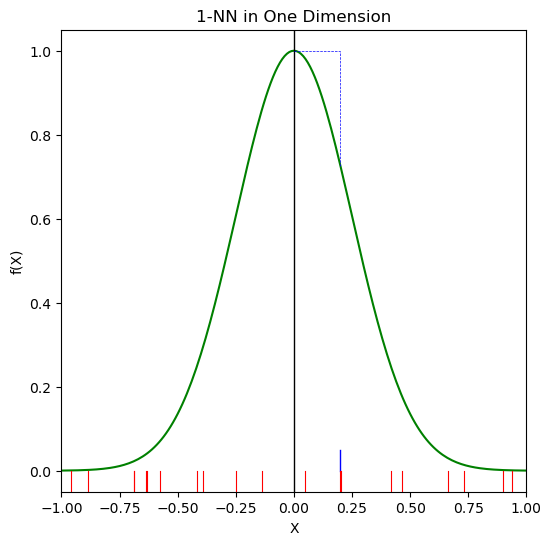

In [217]:
import matplotlib.pyplot as plt
import math
import numpy as np

def f(p: int, x: float) -> float:
    """Target function for 1D."""
    return math.exp(-8 * (x**2))

# Coordinates for the curve
x_cords = np.linspace(-1.0, 1.0, 201)
y_cords = [f(1, x) for x in x_cords]

np.random.seed(42)  
train_points = np.random.uniform(-1, 1, 20)

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_cords, y_cords, 'g')

ax.plot([0, 0], [-0.05, 1.05], color="0", linewidth=1)

ax.plot([0.2, 0.2], [f(1, 0.2), 1], "b--", linewidth=0.5)
ax.plot([0.0, 0.2], [1, 1], "b--", linewidth=0.5)
ax.plot([0.2, 0.2], [0, 0.05], color='blue', linewidth=1)

for x in train_points:
    ax.plot([x, x], [-0.05, 0], color='red', linewidth=0.8)

ax.set_title('1-NN in One Dimension')
ax.set_xlabel('X')
ax.set_ylabel('f(X)')
ax.margins(0, 0)

plt.show()

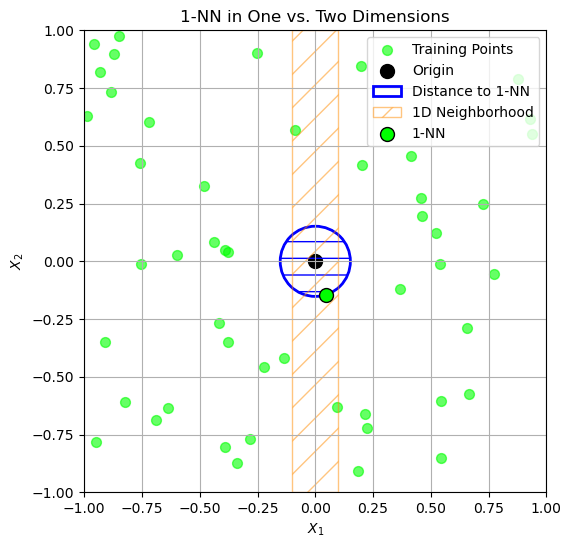

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

np.random.seed(42)
N_2d = 50

# Generate training data in [-1, 1]^2
X_train_2d = np.random.uniform(-1, 1, (N_2d, 2))

distances_2d = np.linalg.norm(X_train_2d, axis=1)
idx_nearest_2d = np.argmin(distances_2d)
x_nearest_2d = X_train_2d[idx_nearest_2d]
d_nearest_2d = distances_2d[idx_nearest_2d]

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c='lime', s=50, alpha=0.6, label='Training Points')

ax.scatter(0, 0, c='black', s=100, label='Origin')

circle = Circle((0, 0), d_nearest_2d, edgecolor='blue', facecolor='none', linestyle='-', linewidth=2, label='Distance to 1-NN')
ax.add_patch(circle)

circle_hatch = Circle((0, 0), d_nearest_2d, edgecolor='blue', facecolor='none', hatch='-', alpha=1)
ax.add_patch(circle_hatch)

delta = 0.1 
rectangle = Rectangle((-delta, -1), 2 * delta, 2, edgecolor='darkorange', facecolor='none', fill=True, alpha=0.5,
                      hatch='/', label='1D Neighborhood')
ax.add_patch(rectangle)

# Plot nearest neighbor
ax.scatter(x_nearest_2d[0], x_nearest_2d[1], c='lime', s=100, edgecolors='k', label='1-NN')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('1-NN in One vs. Two Dimensions')
ax.legend()
ax.grid(True)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', 'box') 

plt.show()

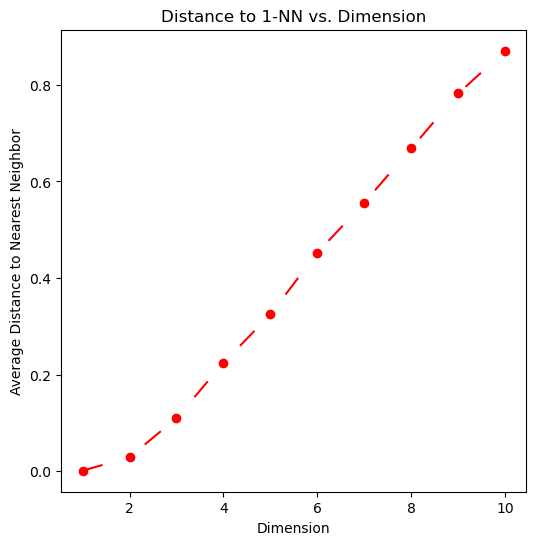

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Generate data
def generate_data(p: int, n: int) -> np.ndarray:
    if p == 1:
        return np.array([random.uniform(-1, 1) for _ in range(n)])
    return np.array([
        [random.uniform(-1, 1) for _ in range(p)]
        for _ in range(n)
    ])

# Target function f(x)
def f(p: int, x: np.ndarray) -> float:
    if p == 1:
        return math.exp(-8 * (x ** 2))
    return math.exp(-8 * sum(xi * xi for xi in x))

# Simulation to compute average distance, variance, and bias
def simulate(p: int, nsample: int, nsim: int) -> dict:
    res = {'average_distance': 0}
    sum_y = 0
    sum_y_square = 0
    
    for _ in range(nsim):
        data = generate_data(p, nsample)
        if p == 1:
            data_norm = np.abs(data)
        else:
            data_norm = np.linalg.norm(data, ord=2, axis=1)
        
        nearest_index = data_norm.argmin()
        nearest_x, nearest_distance = data[nearest_index], data_norm[nearest_index]
        nearest_y = f(p, nearest_x)
        
        sum_y += nearest_y
        sum_y_square += nearest_y * nearest_y
        res['average_distance'] += nearest_distance
    
    # Compute average, variance, and bias
    average_y = sum_y / nsim
    res['average_distance'] /= nsim
    res['variance'] = sum_y_square / nsim - average_y * average_y
    res['squared_bias'] = (1 - average_y) ** 2
    return res

nsim = 100
data = {p: simulate(p, 1000, nsim) for p in range(1, 11)}

# Extract results
dimension = list(data.keys())
average_distance = [d['average_distance'] for p, d in data.items()]
variance = np.array([d['variance'] for p, d in data.items()])
squared_bias = np.array([d['squared_bias'] for p, d in data.items()])
mse = variance + squared_bias

fig, ax = plt.subplots(figsize=(6, 6))

line, = ax.plot(dimension, average_distance, 'ro-', linewidth=1.5, markersize=6)
line.set_dashes([10, 23]) 

ax.set_title('Distance to 1-NN vs. Dimension')
ax.set_xlabel('Dimension')
ax.set_ylabel('Average Distance to Nearest Neighbor')

plt.show()

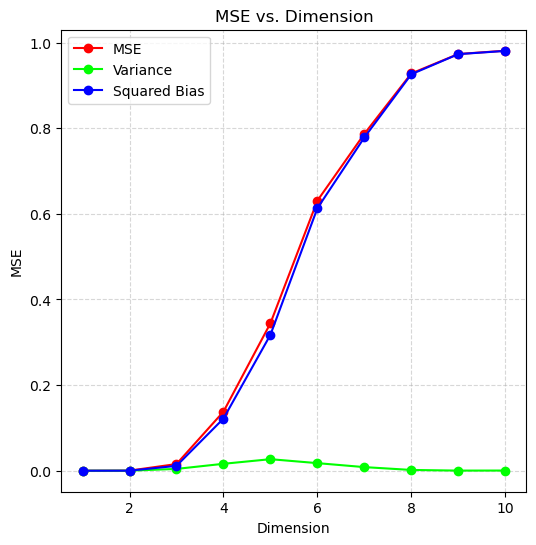

In [214]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(dimension, mse, 'o-', color='red', linewidth=1.5, markersize=6, label='MSE')
ax.plot(dimension, variance, 'o-', color='lime', linewidth=1.5, markersize=6, label='Variance')
ax.plot(dimension, squared_bias, 'o-', color='blue', linewidth=1.5, markersize=6, label='Squared Bias')

ax.set_title('MSE vs. Dimension')
ax.set_xlabel('Dimension')
ax.set_ylabel('MSE')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

**2.8**

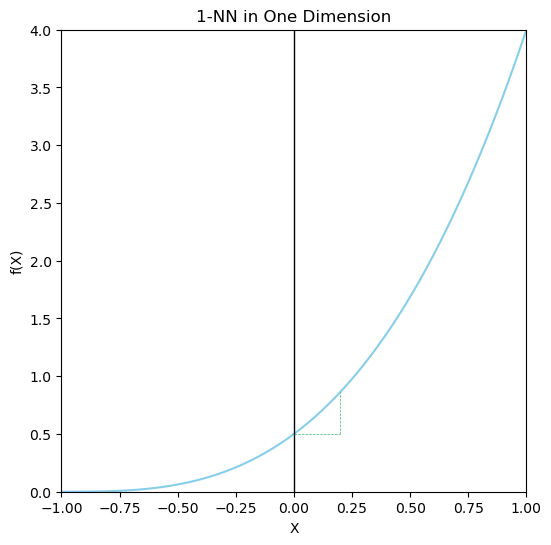

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Define target function f2(x)
def target_function(p: int, x: np.ndarray) -> float:
    if p == 1:
        return (x + 1) ** 3 / 2
    return (x[0] + 1) ** 3 / 2

x_values = np.linspace(-1.0, 1.0, 201)
y_values = [target_function(1, x) for x in x_values]

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_values, y_values, color='skyblue', label='f(X)')
ax.axvline(0, color='black', linewidth=1)
ax.plot([0, 0.2], [target_function(1, 0), target_function(1, 0)], "b--", color="mediumseagreen", linewidth=0.5)
ax.plot([0.2, 0.2], [target_function(1, 0), target_function(1, 0.2)], "b--", color="mediumseagreen", linewidth=0.5)

ax.set_title('1-NN in One Dimension')
ax.set_xlabel('X')
ax.set_ylabel('f(X)')
ax.margins(0, 0)

plt.show()

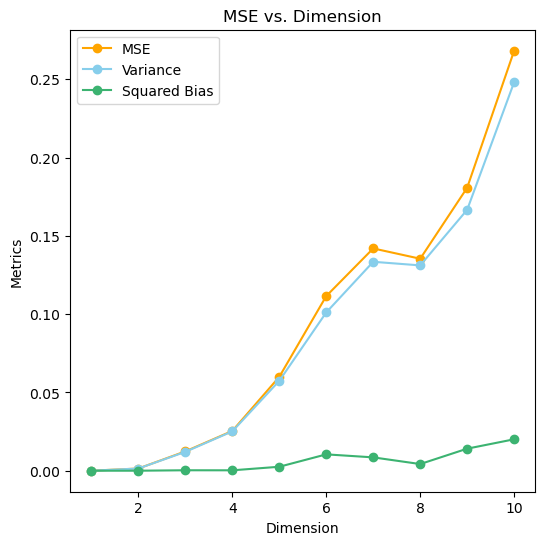

In [209]:
def generate_random_data(p: int, n: int) -> np.ndarray:
    if p == 1:
        return np.array([random.uniform(-1, 1) for _ in range(n)])
    return np.array([
        [random.uniform(-1, 1) for _ in range(p)]
        for _ in range(n)
    ])

# Function to compute metrics
def compute_statistics(p: int, nsample: int, nsim: int) -> dict:
    results = {'average_distance': 0}
    sum_y, sum_y_square = 0, 0
    
    for _ in range(nsim):
        samples = generate_random_data(p, nsample)
        if p == 1:
            distances = np.abs(samples)
        else:
            distances = np.linalg.norm(samples, ord=2, axis=1)
        
        closest_index = distances.argmin()
        closest_sample, closest_distance = samples[closest_index], distances[closest_index]
        predicted_value = target_function(p, closest_sample)
        
        sum_y += predicted_value
        sum_y_square += predicted_value ** 2
        results['average_distance'] += closest_distance
    
    # Calculate mean, variance, and squared bias
    mean_y = sum_y / nsim
    results['average_distance'] /= nsim
    results['variance'] = sum_y_square / nsim - mean_y ** 2
    results['squared_bias'] = (target_function(1, 0) - mean_y) ** 2
    return results

nsim = 100
simulation_results = {p: compute_statistics(p, 1000, nsim) for p in range(1, 11)}

dims = list(simulation_results.keys())
avg_distance = [data['average_distance'] for data in simulation_results.values()]
variances = np.array([data['variance'] for data in simulation_results.values()])
bias_squared = np.array([data['squared_bias'] for data in simulation_results.values()])
mse_values = variances + bias_squared

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(dims, mse_values, 'o-', label='MSE', color='orange')
ax.plot(dims, variances, 'o-', label='Variance', color='skyblue')
ax.plot(dims, bias_squared, 'o-', label='Squared Bias', color='mediumseagreen')
ax.set_title('MSE vs. Dimension')
ax.set_xlabel('Dimension')
ax.set_ylabel('Metrics')
ax.legend()

plt.show()

**2.9**

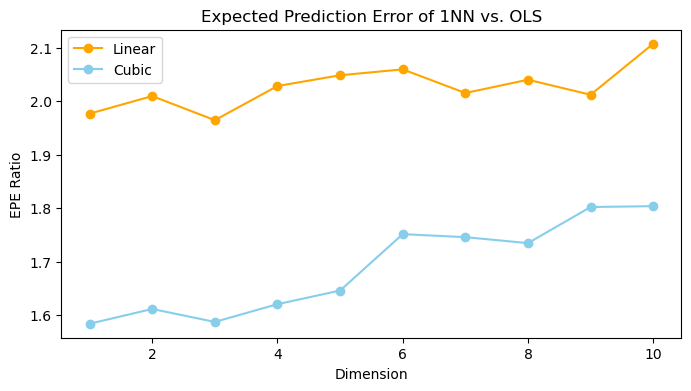

In [224]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 10000
training_set_size = 500
max_dimensions = 10

epe_linear_ols_list = []
epe_linear_1nn_list = []
epe_cubic_ols_list = []
epe_cubic_1nn_list = []

for _ in range(num_simulations):
    # Generate training data
    training_features = np.random.uniform(-1, 1, size=(training_set_size, max_dimensions))
    
    # Generate linear and cubic labels
    linear_labels = training_features[:, 0]  # Use the first dimension (X_1)
    cubic_labels = ((training_features[:, 0] + 1) ** 3) / 2
    noise = np.random.randn(training_set_size)
    noisy_linear_labels = linear_labels + noise
    noisy_cubic_labels = cubic_labels + noise
    
    # Store EPE values for each dimension
    epe_linear_ols = []
    epe_linear_1nn = []
    epe_cubic_ols = []
    epe_cubic_1nn = []
    
    for dim in range(1, max_dimensions + 1):
        # Extract subsets of dimensions
        subset_features = training_features[:, :dim]
        augmented_features = np.hstack((np.ones((training_set_size, 1)), subset_features))
        
        # Observation of true values
        observed_linear_y = np.random.randn(1)
        observed_cubic_y = 0.5 + np.random.randn(1)

        # OLS regression for linear function
        XTX = augmented_features.T @ augmented_features
        XTy_linear = augmented_features.T @ noisy_linear_labels
        ols_coefficients_linear = np.linalg.solve(XTX, XTy_linear)
        ols_estimate = np.array([1] + [0] * dim) @ ols_coefficients_linear
        epe_linear_ols.append((ols_estimate - observed_linear_y) ** 2)

        # 1NN for linear function
        distance_matrix = (subset_features * subset_features).sum(axis=1)
        nearest_neighbor_idx = distance_matrix.argmin()
        nearest_neighbor_prediction = noisy_linear_labels[nearest_neighbor_idx]
        epe_linear_1nn.append((nearest_neighbor_prediction - observed_linear_y) ** 2)

        # OLS regression for cubic function
        XTy_cubic = augmented_features.T @ noisy_cubic_labels
        ols_coefficients_cubic = np.linalg.solve(XTX, XTy_cubic)
        ols_estimate_cubic = np.array([1] + [0] * dim) @ ols_coefficients_cubic
        epe_cubic_ols.append((ols_estimate_cubic - observed_cubic_y) ** 2)

        # 1NN for cubic function
        nearest_neighbor_prediction_cubic = noisy_cubic_labels[nearest_neighbor_idx]
        epe_cubic_1nn.append((nearest_neighbor_prediction_cubic - observed_cubic_y) ** 2)

    epe_linear_ols_list.append(epe_linear_ols)
    epe_linear_1nn_list.append(epe_linear_1nn)
    epe_cubic_ols_list.append(epe_cubic_ols)
    epe_cubic_1nn_list.append(epe_cubic_1nn)

arr_ols_linear_epe = np.array(epe_linear_ols_list)
arr_1nn_linear_epe = np.array(epe_linear_1nn_list)
arr_ols_cubic_epe = np.array(epe_cubic_ols_list)
arr_1nn_cubic_epe = np.array(epe_cubic_1nn_list)

mean_epe_ols_linear = arr_ols_linear_epe.mean(axis=0)
mean_epe_1nn_linear = arr_1nn_linear_epe.mean(axis=0)
mean_epe_ols_cubic = arr_ols_cubic_epe.mean(axis=0)
mean_epe_1nn_cubic = arr_1nn_cubic_epe.mean(axis=0)

# Plot EPE results
dimensions_range = list(range(1, max_dimensions + 1))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dimensions_range, mean_epe_1nn_linear / mean_epe_ols_linear, '-o',
        color='orange', label='Linear')
ax.plot(dimensions_range, mean_epe_1nn_cubic / mean_epe_ols_cubic, '-o',
        color='skyblue', label='Cubic')
ax.set_xlabel('Dimension')
ax.set_ylabel('EPE Ratio')
ax.set_title('Expected Prediction Error of 1NN vs. OLS')
ax.legend()

plt.show()

## Exercise 3 - [15%]

**a)**

Test Size (%)   Accuracy        Test Size (%)   Accuracy       
5%              1.0000          55%             0.9521         
10%             0.9649          60%             0.9415         
15%             0.9535          65%             0.9459         
20%             0.9561          70%             0.9449         
25%             0.9510          75%             0.9461         
30%             0.9532          80%             0.9342         
35%             0.9550          85%             0.9360         
40%             0.9561          90%             0.9006         
45%             0.9650          95%             0.9039         
50%             0.9579                                         


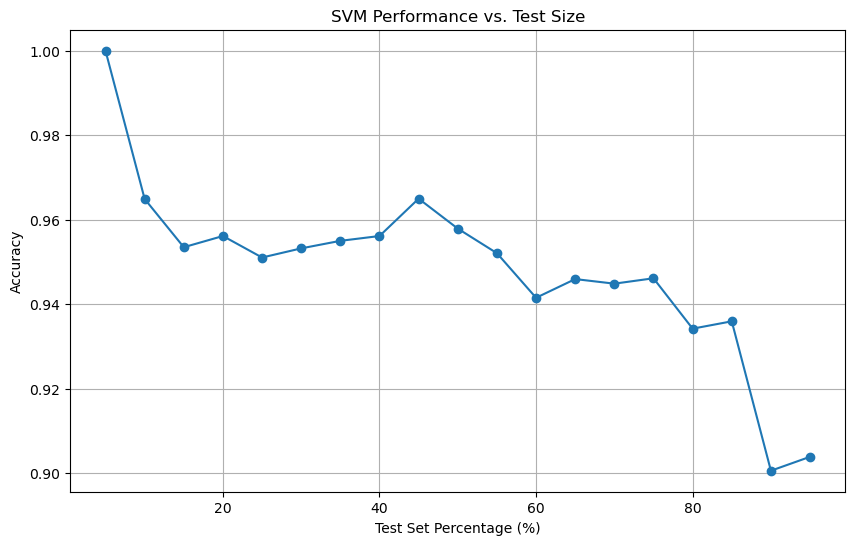

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Test sizes from 5% to 95% with 5% steps
test_sizes = np.arange(0.05, 1.0, 0.05)
accuracies = []

test_size_results = []
accuracy_results = []

print(f"{'Test Size (%)':<15} {'Accuracy':<15} {'Test Size (%)':<15} {'Accuracy':<15}")

for test_size in test_sizes:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Create SVM classifier
    clf = SVC(kernel='linear', random_state=42)
    
    # Train model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    test_size_results.append(f"{test_size * 100:.0f}%")
    accuracy_results.append(f"{accuracy:.4f}")


if len(test_size_results) % 2 != 0:
    test_size_results.append("")
    accuracy_results.append("")

half_length = len(test_size_results) // 2
first_col_test_size = test_size_results[:half_length]
first_col_accuracy = accuracy_results[:half_length]
second_col_test_size = test_size_results[half_length:]
second_col_accuracy = accuracy_results[half_length:]

for i in range(half_length):
    left_test_size = first_col_test_size[i]
    left_accuracy = first_col_accuracy[i]
    right_test_size = second_col_test_size[i] if i < len(second_col_test_size) else ""
    right_accuracy = second_col_accuracy[i] if i < len(second_col_accuracy) else ""
    
    print(f"{left_test_size:<15} {left_accuracy:<15} {right_test_size:<15} {right_accuracy:<15}")

plt.figure(figsize=(10, 6))
plt.plot(test_sizes * 100, accuracies, marker='o')
plt.title('SVM Performance vs. Test Size')
plt.xlabel('Test Set Percentage (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##### *By experimenting with various train/test ratios, we can observe how model accuracy changes:* 

##### *Low Test Ratios (Large Training Set): More training data reduces variance, helping the model generalize better. However, if the test set is too small, performance estimates may be unreliable.*

##### *High Test Ratios (Small Training Set): Less training data increases bias, as the model struggles to capture the data's complexity. A larger test set provides more reliable estimates but may lead to overfitting during training.*

##### *The results suggest that the optimal performance occurs when the test set ratio is between 40% and 50%, confirming that a train/test split where the training set is significantly larger (e.g., 75%-25%) balances bias and variance effectively.*

In [243]:
from sklearn.model_selection import train_test_split

# 55% train+val 45% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.45, random_state=42, stratify=y)

# 50% train 5% val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.0909, random_state=42, stratify=y_temp)

# Print sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 283
Validation set size: 29
Test set size: 257


In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Set possible values for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Configure grid search with cross-validation
grid = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid, cv=5)

# Train on training set
grid.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid.best_params_}")

# Predict on validation set
y_val_pred = grid.predict(X_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

# Combine train and validation sets
X_train_final = np.vstack((X_train, X_val))
y_train_final = np.hstack((y_train, y_val))

# Create classifier with best hyperparameters
final_clf = SVC(kernel='linear', C=grid.best_params_['C'], random_state=42)

# Train on combined train + validation set
final_clf.fit(X_train_final, y_train_final)

# Predict on test set
y_test_pred = final_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

# K-fold splitting comparison
best_svc = SVC(kernel='linear', C=grid.best_params_['C'], random_state=42)

# Perform 5-Fold Cross-Validation
k_fold_scores = cross_val_score(best_svc, X_temp, y_temp, cv=5)

# Print the cross-validation results
print(f"\n")
print(f"5-Fold Cross-Validation Scores: {k_fold_scores}")
print(f"Mean Accuracy: {k_fold_scores.mean():.4f}")

Best parameters: {'C': 10}
Validation accuracy: 0.9310
Test accuracy: 0.9611


5-Fold Cross-Validation Scores: [0.96825397 0.96825397 0.9516129  0.90322581 0.98387097]
Mean Accuracy: 0.9550


**Splitting for time series forecasting**

**k-fold Cross validation for time series forecasting**

## Exercise 4 - [20%]

##### *I will use the SGD approach being a correct method because it allows for incremental updates to the linear model with each incoming data pair (xt,xt') making it ideal for online learning in a streaming context. It requires minimal memory resources, needing to store only the current model parameters (weights and bias), which is 𝑂(𝑑) where 𝑑 is the feature dimension.*

In [7]:
import numpy as np

def initialize_parameters(d):
    w = np.zeros(d)
    b = 0.0
    return w, b

# Logistic loss and gradient
def logistic_loss_gradient(w, b, x, y):
    z = y * (np.dot(w, x) + b)
    loss = np.log(1 + np.exp(-z))
    sigma = 1 / (1 + np.exp(-z))
    gradient_w = - (1 - sigma) * y * x
    gradient_b = - (1 - sigma) * y
    return loss, gradient_w, gradient_b

# SGD training
def sgd(training_data_stream, d, eta=0.01):
    # Initialize parameters
    w, b = initialize_parameters(d)
    
    # Loop over data stream
    for x_t, x_t_prime in training_data_stream:
        # Class A
        y_t = 1
        loss, grad_w, grad_b = logistic_loss_gradient(w, b, x_t, y_t)
        w -= eta * grad_w
        b -= eta * grad_b
        
        # Class B
        y_t_prime = -1
        loss, grad_w, grad_b = logistic_loss_gradient(w, b, x_t_prime, y_t_prime)
        w -= eta * grad_w
        b -= eta * grad_b
        
    return w, b


def data_stream_generator(num_samples, d):
    for _ in range(num_samples):
        # Class A sample
        x_t = np.random.randn(d) + 2  # Centered at +2
        # Class B sample
        x_t_prime = np.random.randn(d) - 2  # Centered at -2
        yield x_t, x_t_prime

# Parameters
num_samples = 1000  # Number of pairs
d = 10             # Data dimension
eta = 0.01         # Learning rate

# Generate data stream
training_data_stream = data_stream_generator(num_samples, d)

w, b = sgd(training_data_stream, d, eta)

# Trained model parameters
print("Learned model parameters:")
print("w =", w)
print("b =", b)

# Prediction function
def predict(x):
    z = np.dot(w, x) + b
    return 1 if z >= 0 else -1

x_new = np.random.randn(d)
prediction = predict(x_new)
print("Prediction for new observation:", prediction)

Learned model parameters:
w = [0.33572886 0.32165586 0.34765824 0.34284319 0.36548925 0.32817896
 0.34552461 0.37144548 0.37102321 0.35345142]
b = 0.0046338603850955284
Prediction for new observation: 1


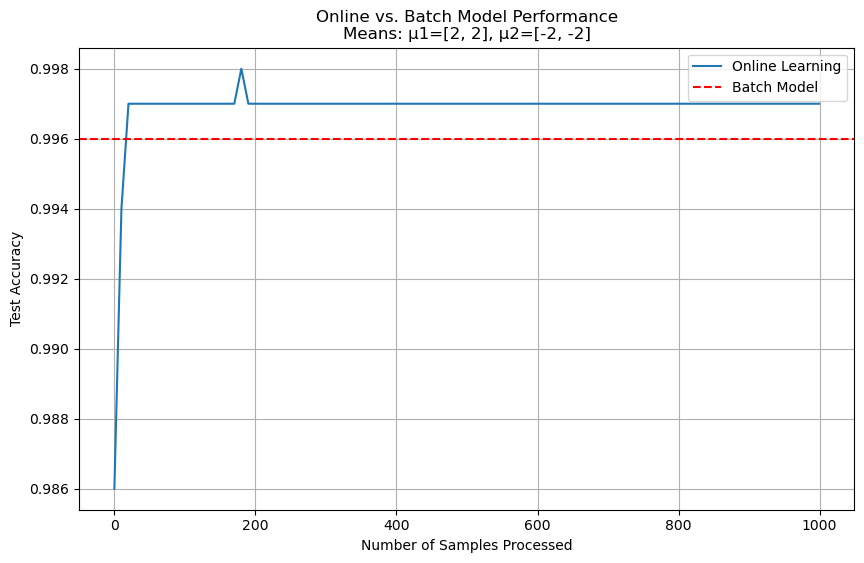

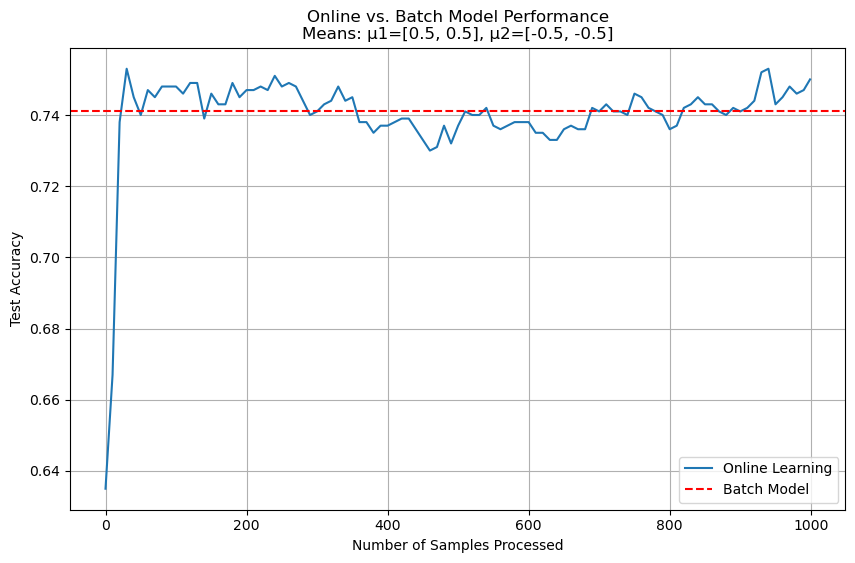

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(42)

# Parameters
n = 500        # Instances per class
N = 2 * n      # Total data points
d = 2          # Data dimension (2D)
eta0 = 0.01    # Initial learning rate for SGD
mu_pairs = [([2, 2], [-2, -2]),  # Easy case
            ([0.5, 0.5], [-0.5, -0.5])]  # Hard case

for mu1, mu2 in mu_pairs:
    # Generate training data
    X_class_A = np.random.randn(n, d) + mu1
    y_class_A = np.ones(n)
    X_class_B = np.random.randn(n, d) + mu2
    y_class_B = -np.ones(n)
    
    # Combine and shuffle data
    X_train = np.vstack((X_class_A, X_class_B))
    y_train = np.hstack((y_class_A, y_class_B))
    permutation = np.random.permutation(N)
    X_train = X_train[permutation]
    y_train = y_train[permutation]
    
    # Generate test set
    X_test_class_A = np.random.randn(n, d) + mu1
    y_test_class_A = np.ones(n)
    X_test_class_B = np.random.randn(n, d) + mu2
    y_test_class_B = -np.ones(n)
    X_test = np.vstack((X_test_class_A, X_test_class_B))
    y_test = np.hstack((y_test_class_A, y_test_class_B))
    
    # Batch model
    batch_model = LogisticRegression()
    batch_model.fit(X_train, y_train)
    batch_predictions = batch_model.predict(X_test)
    batch_accuracy = accuracy_score(y_test, batch_predictions)
    
    # SGD
    sgd_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=eta0, penalty=None)
    
    accuracies = []
    # Initialize model
    sgd_model.partial_fit(X_train[0:1], y_train[0:1], classes=np.array([-1, 1]))
    accuracies.append(accuracy_score(y_test, sgd_model.predict(X_test)))
    
    # updates
    for t in range(1, N):
        x_t = X_train[t:t+1]
        y_t = y_train[t:t+1]
        sgd_model.partial_fit(x_t, y_t)
        # Evaluate performance at intervals
        if t % 10 == 0 or t == N - 1:
            y_pred = sgd_model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)
    
    # Plot
    plt.figure(figsize=(10, 6))
    steps = list(range(0, N, 10))
    if steps[-1] != N - 1:
        steps.append(N - 1)
    plt.plot(steps, accuracies, label='Online Learning')
    plt.axhline(y=batch_accuracy, color='red', linestyle='--', label='Batch Model')
    plt.xlabel('Number of Samples Processed')
    plt.ylabel('Test Accuracy')
    plt.title(f'Online vs. Batch Model Performance\nMeans: μ1={mu1}, μ2={mu2}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Exercise 5 - [10%]

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

def Regularity(X, Y, classifier, k):
    n_samples = X.shape[0]
    n_neighbors = min(k + 1, n_samples)
    if n_neighbors < 2:
        return np.nan
    Y_pred = classifier.predict(X)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, indices = nbrs.kneighbors(X)
    regularity_sum = 0.0
    for i in range(n_samples):
        neighbor_indices = indices[i][1:]
        neighbor_labels = Y[neighbor_indices]
        matching = np.sum(Y_pred[i] == neighbor_labels)
        regularity_i = matching / (n_neighbors - 1)
        regularity_sum += regularity_i
    regularity = regularity_sum / n_samples
    return regularity

# Parameters
sigma = 2
n_list = [50, 100, 200, 500]
d_list = list(range(1, 11)) + [20, 30, 50, 100]
delta_list = [sigma * i for i in range(1, 5)]  # [σ, 2σ, 3σ, 4σ]
k_list = list(range(1, 11))
n_runs = 10

def generate_data(n_i, d, delta):
    n_samples = n_i
    mean_class_1 = np.zeros(d)
    mean_class_2 = np.zeros(d)
    mean_class_2[0] = delta
    cov = np.eye(d) * sigma**2
    X_class_1 = np.random.multivariate_normal(mean_class_1, cov, n_samples)
    X_class_2 = np.random.multivariate_normal(mean_class_2, cov, n_samples)
    Y_class_1 = np.zeros(n_samples)
    Y_class_2 = np.ones(n_samples)
    X = np.vstack((X_class_1, X_class_2))
    Y = np.hstack((Y_class_1, Y_class_2))
    return X, Y

results = []

for n in n_list:
    for d in d_list:
        for delta in delta_list:
            for k in k_list:
                accuracy_knn_runs = []
                regularity_knn_runs = []
                accuracy_tree_runs = []
                regularity_tree_runs = []
                accuracy_knn_cv_runs = []
                regularity_knn_cv_runs = []
                accuracy_tree_cv_runs = []
                regularity_tree_cv_runs = []

                for run in range(n_runs):
                    X, Y = generate_data(n, d, delta)
                    indices = np.arange(len(Y))
                    np.random.shuffle(indices)
                    X = X[indices]
                    Y = Y[indices]

                    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

                    # ---- Without CV ----
                    # kNN
                    knn = KNeighborsClassifier(n_neighbors=k)
                    knn.fit(X_train, Y_train)
                    Y_pred_knn = knn.predict(X_test)
                    accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
                    regularity_knn = Regularity(X_test, Y_test, knn, k)
                    accuracy_knn_runs.append(accuracy_knn)
                    regularity_knn_runs.append(regularity_knn)

                    # Decision Tree
                    max_depth = int(np.log2(n * 2))
                    tree = DecisionTreeClassifier(max_depth=max_depth)
                    tree.fit(X_train, Y_train)
                    Y_pred_tree = tree.predict(X_test)
                    accuracy_tree = accuracy_score(Y_test, Y_pred_tree)
                    regularity_tree = Regularity(X_test, Y_test, tree, k)
                    accuracy_tree_runs.append(accuracy_tree)
                    regularity_tree_runs.append(regularity_tree)

                    # ---- With 10-fold CV ----
                    # Adjust number of splits
                    n_splits = min(10, len(X))
                    if n_splits < 2:
                        print(f"Not enough samples for CV in configuration n={n}, d={d}, delta={delta}, k={k}")
                        continue  # Skip this run

                    kf = KFold(n_splits=n_splits)

                    accuracy_knn_cv = []
                    regularity_knn_cv = []
                    accuracy_tree_cv = []
                    regularity_tree_cv = []

                    for train_index, test_index in kf.split(X):
                        X_train_cv, X_test_cv = X[train_index], X[test_index]
                        Y_train_cv, Y_test_cv = Y[train_index], Y[test_index]

                        if len(Y_train_cv) < k:
                            continue

                        # kNN
                        knn_cv = KNeighborsClassifier(n_neighbors=k)
                        knn_cv.fit(X_train_cv, Y_train_cv)
                        Y_pred_knn_cv = knn_cv.predict(X_test_cv)
                        acc_knn_cv = accuracy_score(Y_test_cv, Y_pred_knn_cv)
                        reg_knn_cv = Regularity(X_test_cv, Y_test_cv, knn_cv, k)
                        accuracy_knn_cv.append(acc_knn_cv)
                        regularity_knn_cv.append(reg_knn_cv)

                        # Decision Tree
                        tree_cv = DecisionTreeClassifier(max_depth=max_depth)
                        tree_cv.fit(X_train_cv, Y_train_cv)
                        Y_pred_tree_cv = tree_cv.predict(X_test_cv)
                        acc_tree_cv = accuracy_score(Y_test_cv, Y_pred_tree_cv)
                        reg_tree_cv = Regularity(X_test_cv, Y_test_cv, tree_cv, k)
                        accuracy_tree_cv.append(acc_tree_cv)
                        regularity_tree_cv.append(reg_tree_cv)

                    # Mean CV scores
                    if accuracy_knn_cv:
                        accuracy_knn_cv_runs.append(np.mean(accuracy_knn_cv))
                        regularity_knn_cv_runs.append(np.mean(regularity_knn_cv))
                    if accuracy_tree_cv:
                        accuracy_tree_cv_runs.append(np.mean(accuracy_tree_cv))
                        regularity_tree_cv_runs.append(np.mean(regularity_tree_cv))

                # Averages over runs
                avg_accuracy_knn = np.nanmean(accuracy_knn_runs)
                avg_regularity_knn = np.nanmean(regularity_knn_runs)
                avg_accuracy_tree = np.nanmean(accuracy_tree_runs)
                avg_regularity_tree = np.nanmean(regularity_tree_runs)

                avg_accuracy_knn_cv = np.nanmean(accuracy_knn_cv_runs) if accuracy_knn_cv_runs else np.nan
                avg_regularity_knn_cv = np.nanmean(regularity_knn_cv_runs) if regularity_knn_cv_runs else np.nan
                avg_accuracy_tree_cv = np.nanmean(accuracy_tree_cv_runs) if accuracy_tree_cv_runs else np.nan
                avg_regularity_tree_cv = np.nanmean(regularity_tree_cv_runs) if regularity_tree_cv_runs else np.nan

                # Store results
                results.append({
                    'n': n,
                    'd': d,
                    'delta': delta,
                    'k': k,
                    'accuracy_knn': avg_accuracy_knn,
                    'regularity_knn': avg_regularity_knn,
                    'accuracy_tree': avg_accuracy_tree,
                    'regularity_tree': avg_regularity_tree,
                    'accuracy_knn_cv': avg_accuracy_knn_cv,
                    'regularity_knn_cv': avg_regularity_knn_cv,
                    'accuracy_tree_cv': avg_accuracy_tree_cv,
                    'regularity_tree_cv': avg_regularity_tree_cv
                })

                # Print results for this configuration
                print(f"Configuration: n={n}, d={d}, delta={delta}, k={k}")
                print(f"Accuracy kNN: {avg_accuracy_knn:.4f}, Regularity kNN: {avg_regularity_knn:.4f}")
                print(f"Accuracy Tree: {avg_accuracy_tree:.4f}, Regularity Tree: {avg_regularity_tree:.4f}")
                print(f"Accuracy kNN CV: {avg_accuracy_knn_cv:.4f}, Regularity kNN CV: {avg_regularity_knn_cv:.4f}")
                print(f"Accuracy Tree CV: {avg_accuracy_tree_cv:.4f}, Regularity Tree CV: {avg_regularity_tree_cv:.4f}")
                print("-" * 60)

df_results = pd.DataFrame(results)

Configuration: n=50, d=1, delta=2, k=1
Accuracy kNN: 0.6100, Regularity kNN: 0.6267
Accuracy Tree: 0.6167, Regularity Tree: 0.6267
Accuracy kNN CV: 0.5940, Regularity kNN CV: 0.5710
Accuracy Tree CV: 0.6240, Regularity Tree CV: 0.5850
------------------------------------------------------------
Configuration: n=50, d=1, delta=2, k=2
Accuracy kNN: 0.6333, Regularity kNN: 0.6017
Accuracy Tree: 0.6100, Regularity Tree: 0.6017
Accuracy kNN CV: 0.5950, Regularity kNN CV: 0.5835
Accuracy Tree CV: 0.6030, Regularity Tree CV: 0.5885
------------------------------------------------------------
Configuration: n=50, d=1, delta=2, k=3
Accuracy kNN: 0.6167, Regularity kNN: 0.5978
Accuracy Tree: 0.6200, Regularity Tree: 0.5944
Accuracy kNN CV: 0.6050, Regularity kNN CV: 0.5867
Accuracy Tree CV: 0.6110, Regularity Tree CV: 0.5740
------------------------------------------------------------
Configuration: n=50, d=1, delta=2, k=4
Accuracy kNN: 0.6033, Regularity kNN: 0.5683
Accuracy Tree: 0.5700, Regul

KeyboardInterrupt: 

##### *K-NN classifier consider the K closest neighbour point without consider the distance between them to classify a point where R-NN classifier consider every neighbour located in a radius R around the point that it tries to classify.*

##### *K-NN is better when the density of the data is uniform on the whole characteristics space OR when a fixed number of neighbours is enough.*

##### *R-NN is better when the density of the data varies on characteristics space OR when we want the classifier to adapt automatically to the number of considered neighbour in function of the local density.*

##### *With a R-NN classifier, the regularity measure needs to account for the varying number of neighbors for each point. It calculates the proportion of neighbors (within radius 𝑟 whose predictions match the actual labels. If a point has no neighbors in 𝑟, it can be excluded or assigned a neutral regularity. The evaluation should consider the changing number of neighbors, especially in low-density areas. During experiments, we will vary the radius r to see how it affects Accuracy and Regularity*

## Exercise 7 - [10%]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()

# Data
X = diabetes.data
y = diabetes.target

# Exclude the 11th feature (assuming X has 10 features)
X = X[:, :-1]  # Keep first 9 features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 0, 50)

# Grid search for Ridge
param_grid_ridge = {'alpha': alphas}
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Best α for Ridge
best_alpha_ridge = grid_search_ridge.best_estimator_.alpha
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# Grid search for Lasso
param_grid_lasso = {'alpha': alphas}
lasso = Lasso(max_iter=10000)  # Increase max_iter for convergence
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Best α for Lasso
best_alpha_lasso = grid_search_lasso.best_estimator_.alpha
print(f"Best alpha for Lasso: {best_alpha_lasso}")

Best alpha for Ridge: 0.04941713361323833
Best alpha for Lasso: 0.05963623316594643


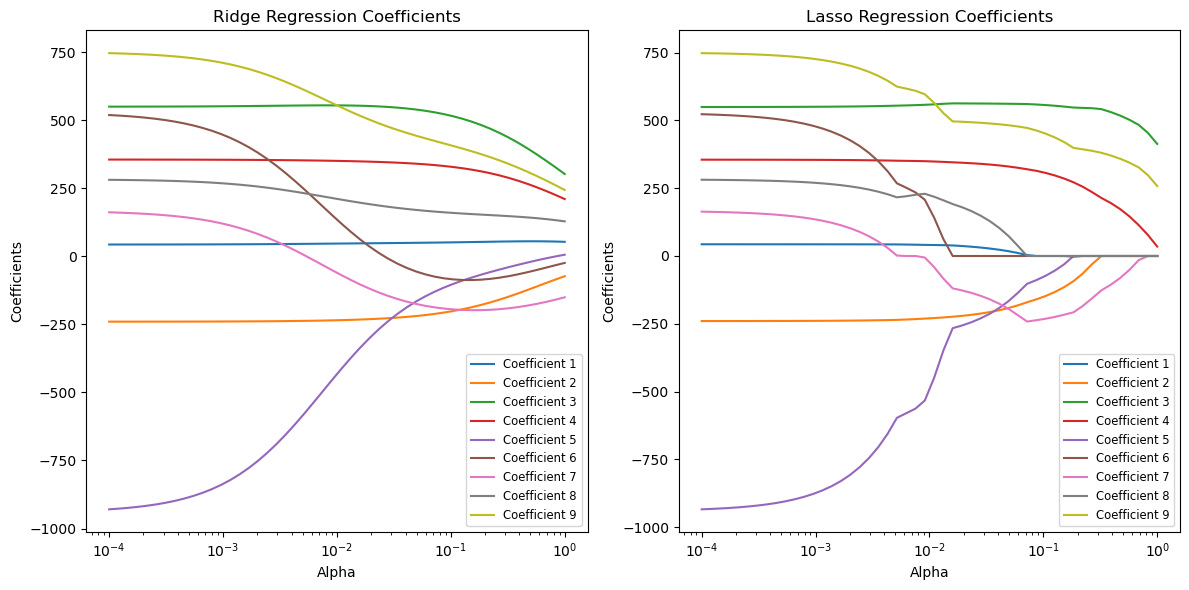

In [12]:
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_best.predict(X_test)

lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_best.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_best.predict(X_test)

coefs_ridge = []

# Coefffdicients for Ridge
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge)

coefs_lasso = []

# Coefficients for Lasso
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = np.array(coefs_lasso)

plt.figure(figsize=(12, 6))

# Ridge Coefficients
plt.subplot(1, 2, 1)
for i in range(coefs_ridge.shape[1]):
    plt.plot(alphas, coefs_ridge[:, i], label=f'Coefficient {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.xscale('log')
plt.legend(loc='best', fontsize='small')

# Lasso Coefficients
plt.subplot(1, 2, 2)
for i in range(coefs_lasso.shape[1]):
    plt.plot(alphas, coefs_lasso[:, i], label=f'Coefficient {i+1}')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.xscale('log')
plt.legend(loc='best', fontsize='small')

plt.show()

R^2 for Ridge Regression: 0.4556
R^2 for Lasso Regression: 0.4671


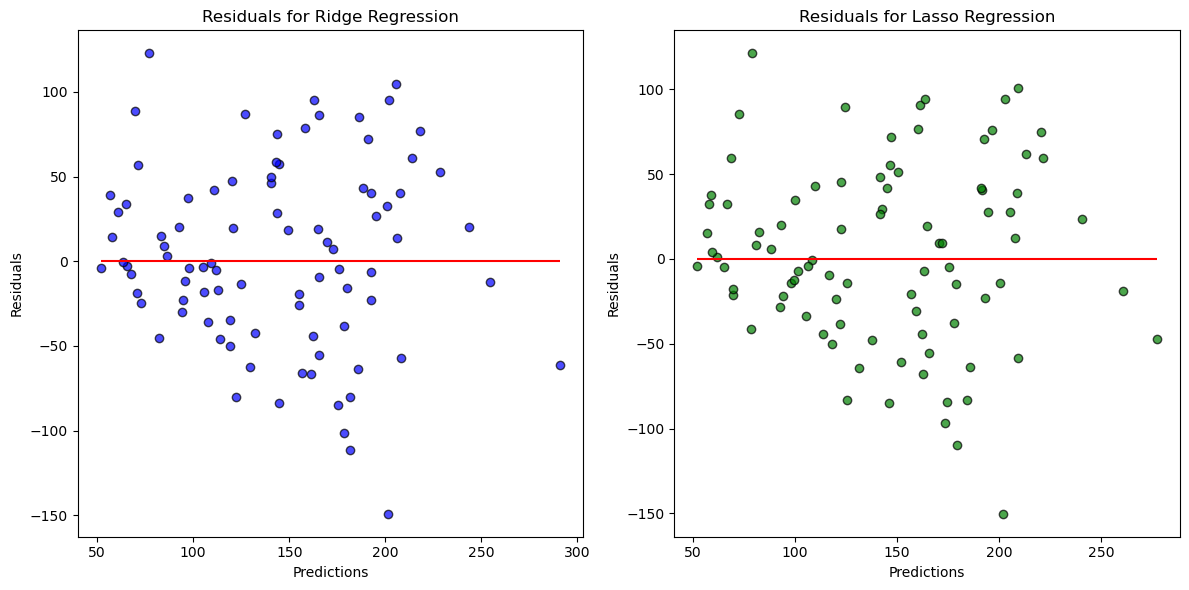

In [13]:
# Residuals for Ridge
residuals_ridge = y_test - y_pred_ridge

# Residuals for Lasso
residuals_lasso = y_test - y_pred_lasso

# R^2 Score for Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 for Ridge Regression: {r2_ridge:.4f}")

# R^2 Score for Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R^2 for Lasso Regression: {r2_lasso:.4f}")

plt.figure(figsize=(12, 6))

# Residuals plot for Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_pred_ridge, residuals_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=y_pred_ridge.min(), xmax=y_pred_ridge.max(), colors='red')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals for Ridge Regression')

# Residuals plot for Lasso
plt.subplot(1, 2, 2)
plt.scatter(y_pred_lasso, residuals_lasso, color='green', edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=y_pred_lasso.min(), xmax=y_pred_lasso.max(), colors='red')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals for Lasso Regression')

plt.show()

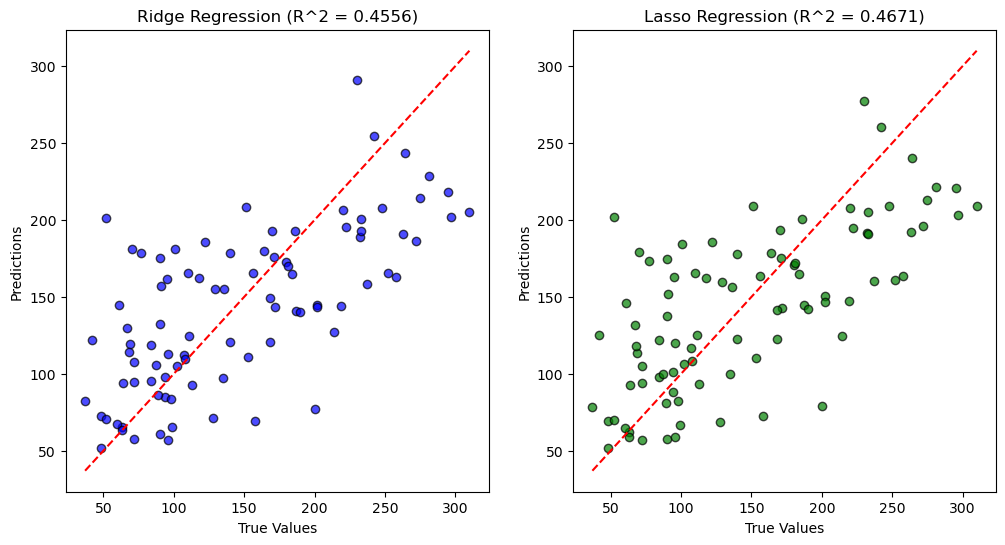

In [14]:
plt.figure(figsize=(12, 6))

# Ridge Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Ridge Regression (R^2 = {r2_ridge:.4f})')

# Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Lasso Regression (R^2 = {r2_lasso:.4f})')

plt.show()

##### *Ridge reduces coefficients without setting them to zero, retaining all features. It's useful when we believe every feature has value.*

##### *Lasso performs feature selection by setting some coefficients to zero, simplifying the model and making it more interpretable.*

##### *As we can see above, In the results obtained, Lasso has a slightly better R^2 score (0.4671 vs. 0.4556 for Ridge), suggesting that eliminating some irrelevant features helped improve the prediction of disease progression.*